In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/MachineLearningPractice/FinanceRiskControl')

# Load data

In [4]:
data_train = pd.read_csv('originalDataset/train.csv')
data_test_a = pd.read_csv('originalDataset/testA.csv')

In [5]:
data_train_cp = data_train.copy()
data_test_a_cp = data_test_a.copy()

# Overall understanding

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [7]:
data_train.describe()

id       loanAmnt  ...            n13            n14
count  800000.000000  800000.000000  ...  759730.000000  759730.000000
mean   399999.500000   14416.818875  ...       0.089366       2.178606
std    230940.252015    8716.086178  ...       0.509069       1.844377
min         0.000000     500.000000  ...       0.000000       0.000000
25%    199999.750000    8000.000000  ...       0.000000       1.000000
50%    399999.500000   12000.000000  ...       0.000000       2.000000
75%    599999.250000   20000.000000  ...       0.000000       3.000000
max    799999.000000   40000.000000  ...      39.000000      30.000000

[8 rows x 42 columns]

In [8]:
data_train.head(3).append(data_train.tail(3))

id  loanAmnt  term  interestRate  ...  n11  n12  n13  n14
0            0   35000.0     5         19.52  ...  0.0  0.0  0.0  2.0
1            1   18000.0     5         18.49  ...  NaN  NaN  NaN  NaN
2            2   12000.0     5         16.99  ...  0.0  0.0  0.0  4.0
799997  799997    6000.0     3         13.33  ...  0.0  0.0  1.0  4.0
799998  799998   19200.0     3          6.92  ...  0.0  0.0  0.0  5.0
799999  799999    9000.0     3         11.06  ...  0.0  0.0  0.0  2.0

[6 rows x 47 columns]

In [9]:
# nan可视化
def seeWhichColumnsHaveMissingValues(data_train): 
    missing = data_train.isnull().sum()/len(data_train)
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()

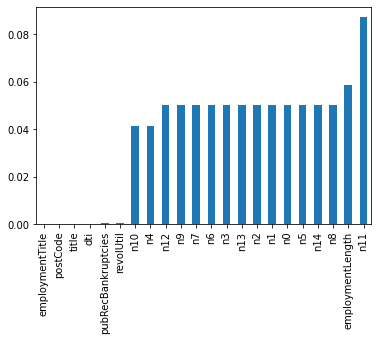

In [10]:
seeWhichColumnsHaveMissingValues(data_train)

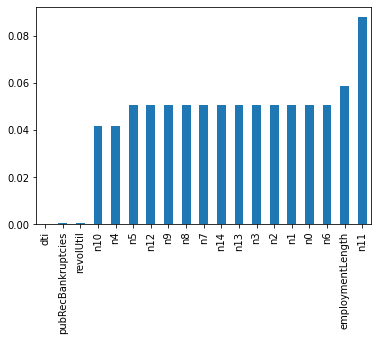

In [13]:
seeWhichColumnsHaveMissingValues(data_test_a)

从上述的图可以看出来，22列有空值，但是每一个列里面的空值都不多。

揭晓一个答案，那就是，有一个列没有用: `policyCode`

# Get into features

In [14]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [15]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea

numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [17]:
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [18]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [19]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [26]:
def countValues(numerical_noserial_fea, data_train): 
    for fea in numerical_noserial_fea:
        if fea == "isDefault":
            continue
        print("--------{}----------".format(fea))
        print(data_train[fea].value_counts())


In [30]:
print("Nonserial feature: \n")
print("data_train: \n")
countValues(numerical_noserial_fea, data_train)
print("\n\n")
print("data_test_A: \n")
countValues(numerical_noserial_fea, data_test_a)

Nonserial feature: 

data_train: 

--------term----------
3    606902
5    193098
Name: term, dtype: int64
--------homeOwnership----------
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64
--------verificationStatus----------
1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64
--------initialListStatus----------
0    466438
1    333562
Name: initialListStatus, dtype: int64
--------applicationType----------
0    784586
1     15414
Name: applicationType, dtype: int64
--------policyCode----------
1.0    800000
Name: policyCode, dtype: int64
--------n11----------
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64
--------n12----------
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64



data_test_A: 

--------term----------
3    151831
5     48169
Name: term, dtype: int64
--------homeOwnership----------
0    98946
1    79391
2

In [77]:
heheda = data_train["employmentLength"].value_counts(dropna=False)

In [78]:
heheda

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
NaN           46799
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

In [75]:
def see_NoserialCategory(colName, data_train):
    plt.figure(figsize=(8, 8))
    sns.barplot(data_train["{}".format(colName)].value_counts(dropna=False),
                data_train["{}".format(colName)].value_counts(dropna=False).keys())
    plt.show()

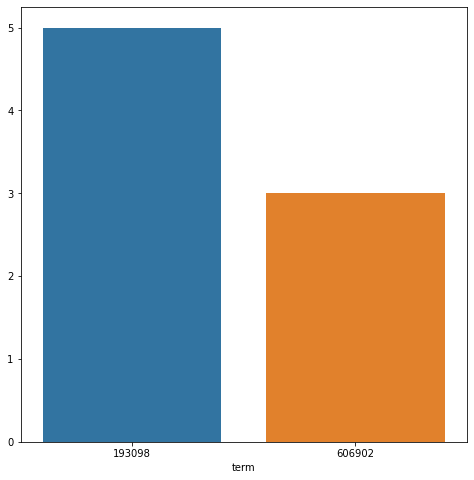

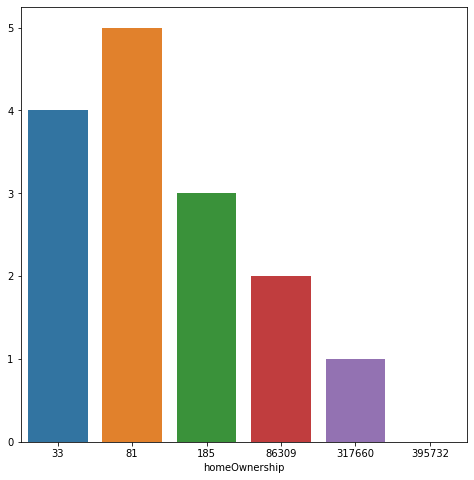

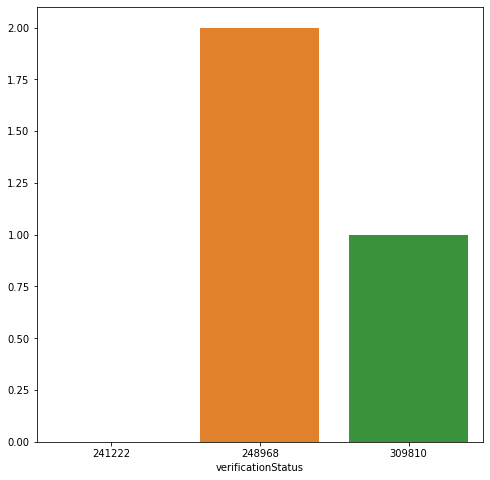

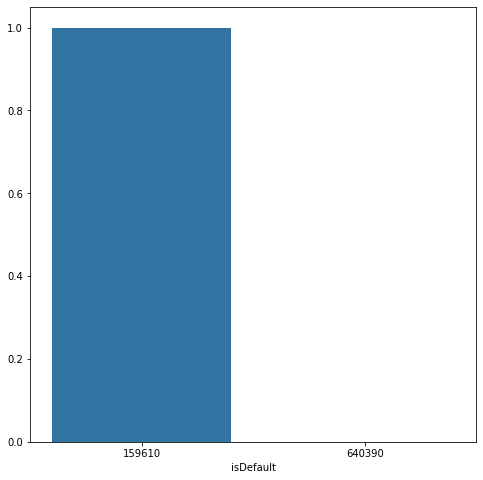

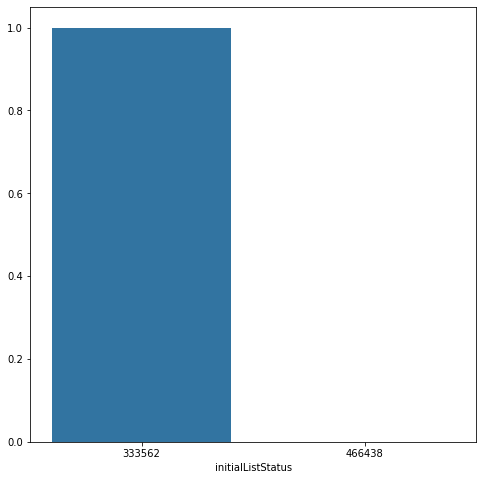

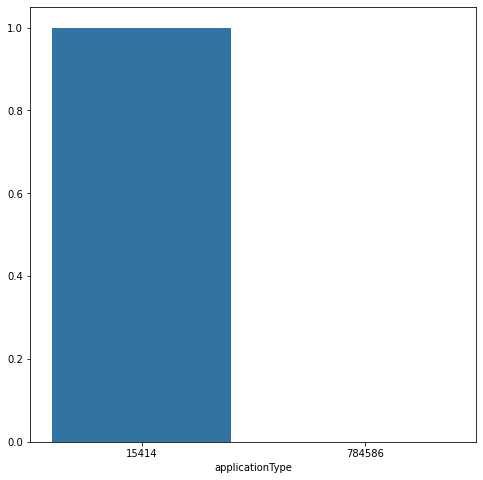

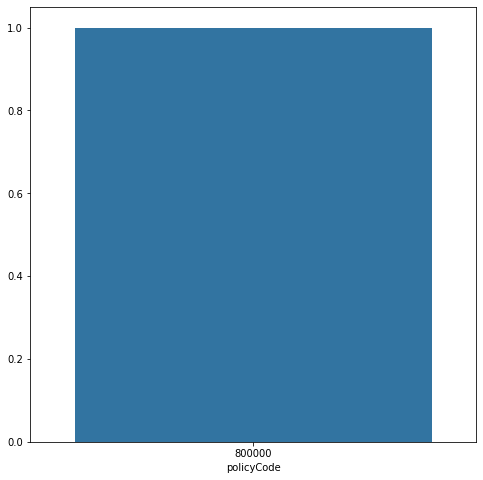

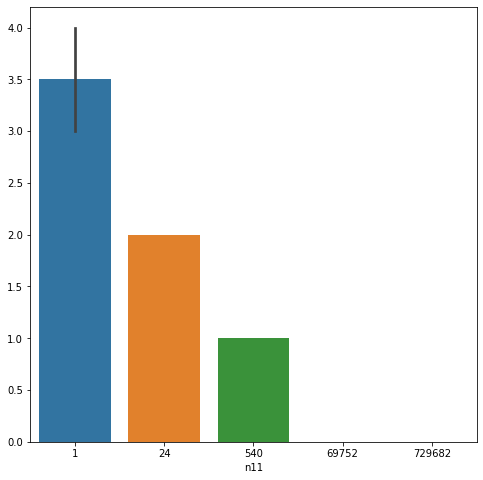

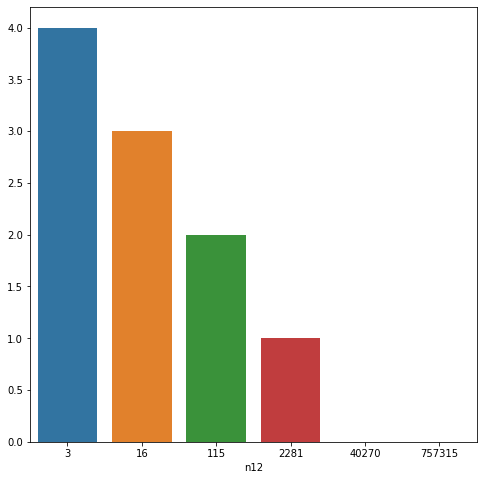

In [76]:
for fea in numerical_noserial_fea:
    see_NoserialCategory(fea, data_train)

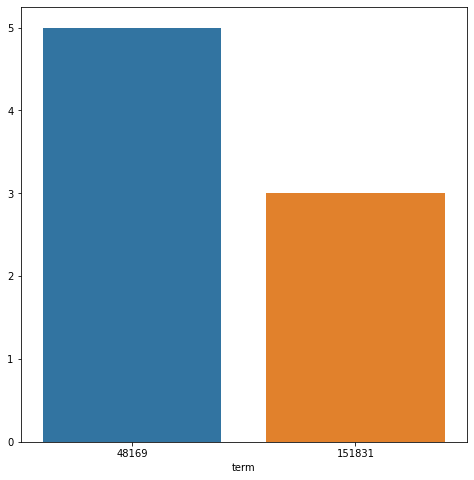

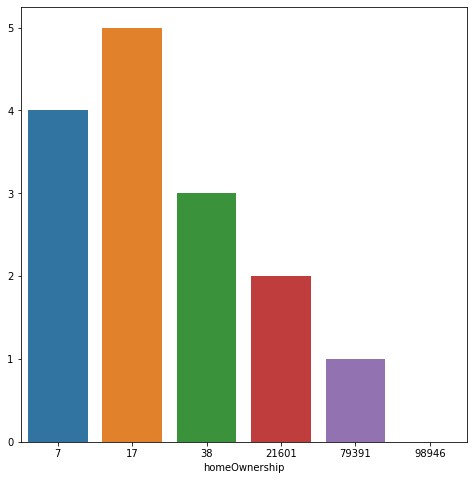

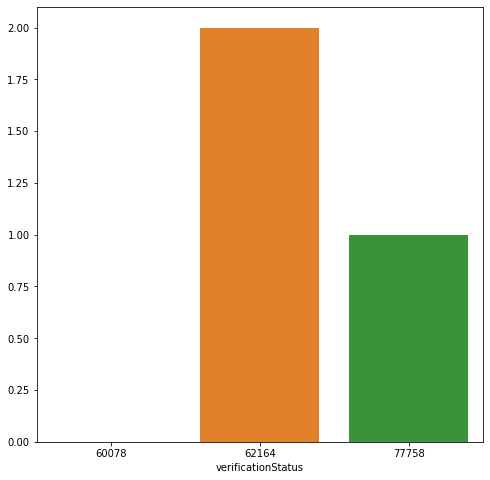

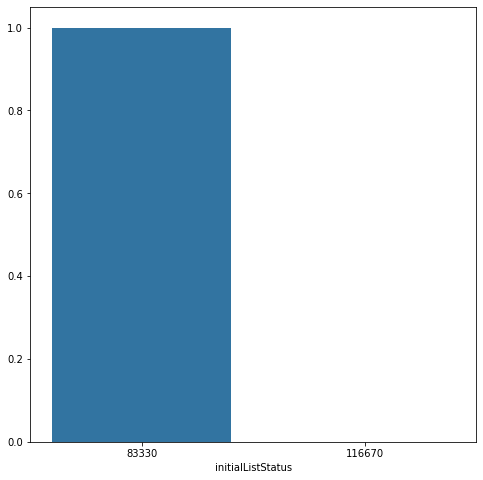

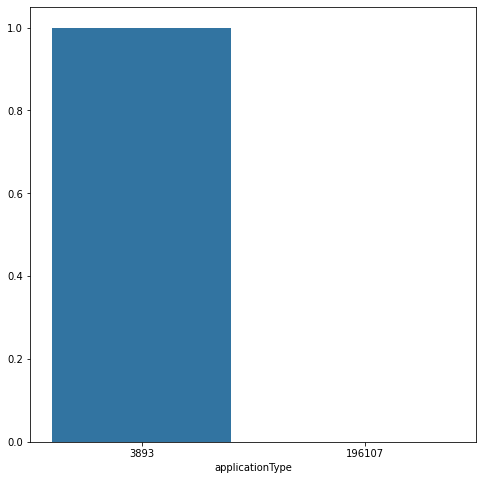

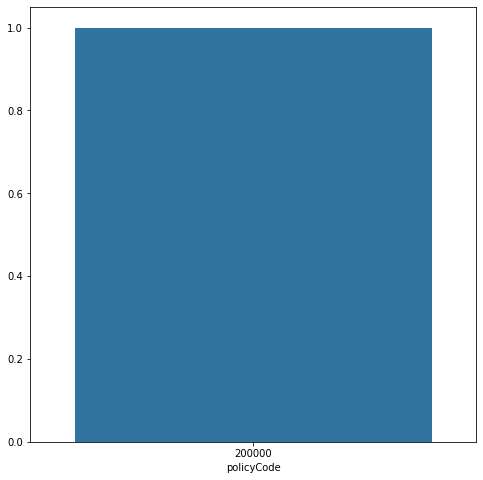

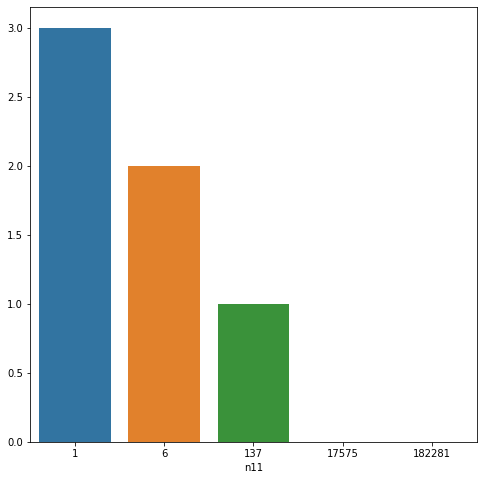

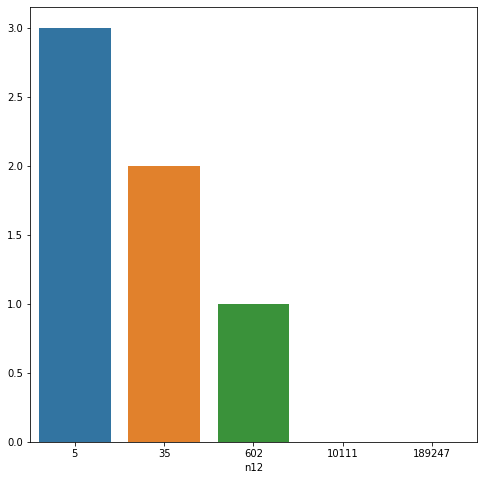

In [81]:
for fea in numerical_noserial_fea:
    if fea == "isDefault":
        continue
    see_NoserialCategory(fea, data_test_a)

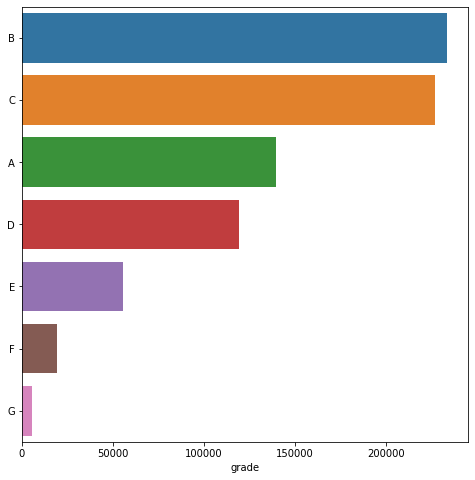

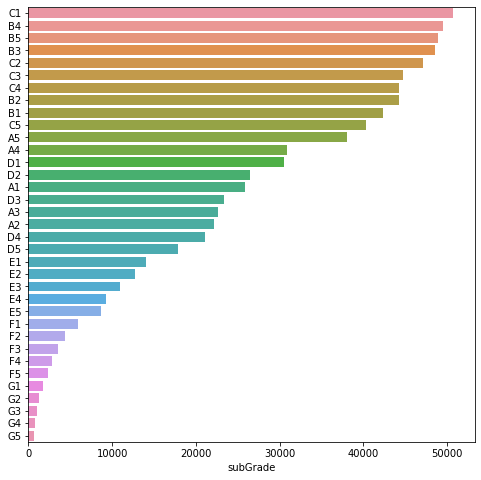

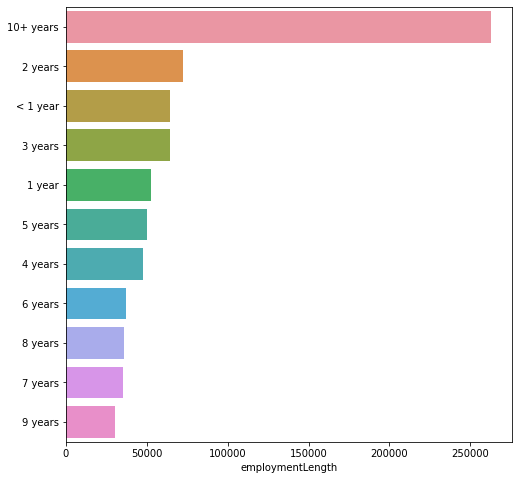

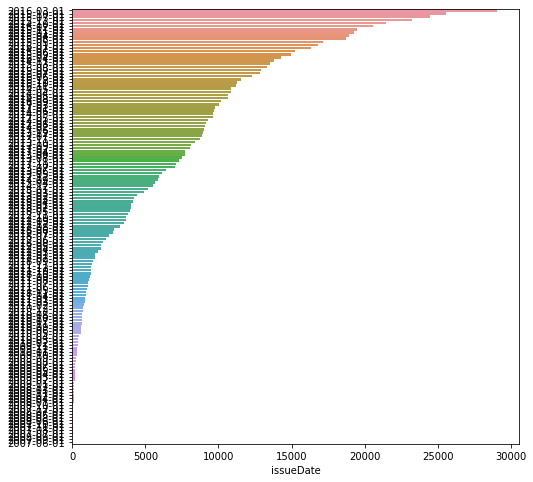

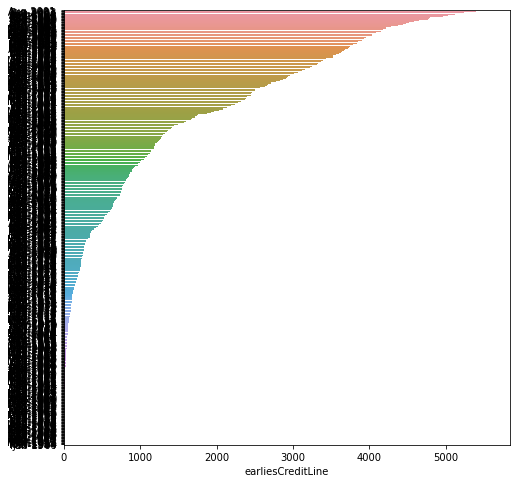

In [79]:
for fea in category_fea:
    see_NoserialCategory(fea, data_train)

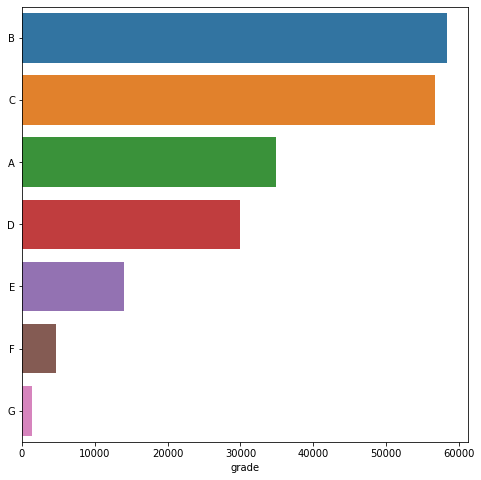

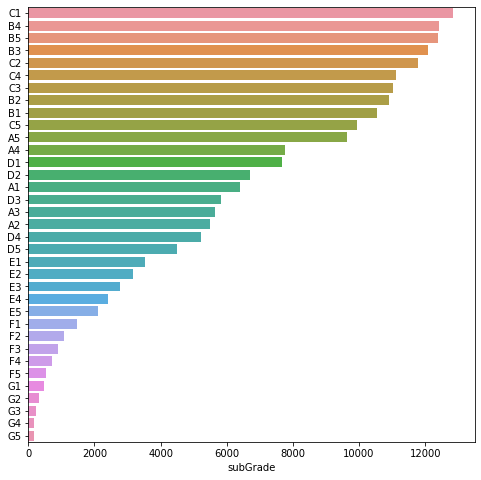

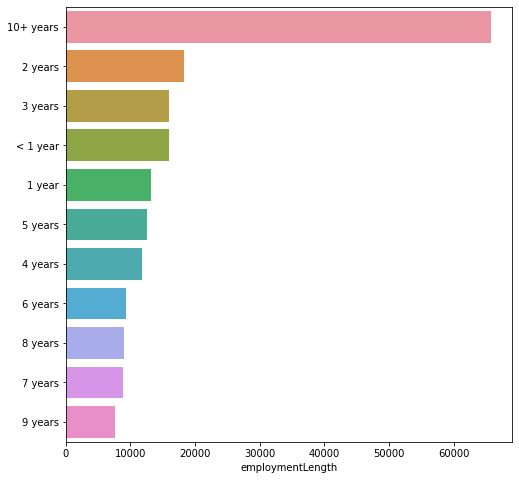

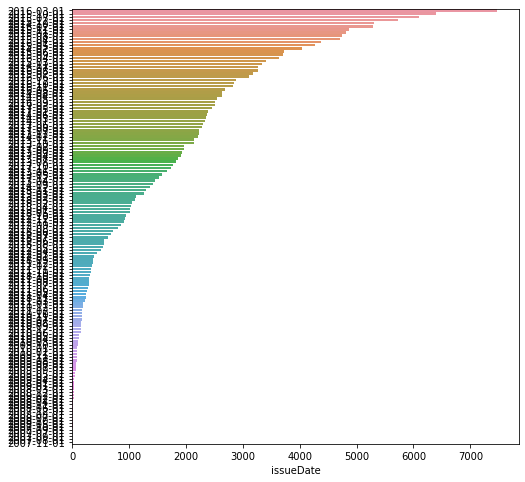

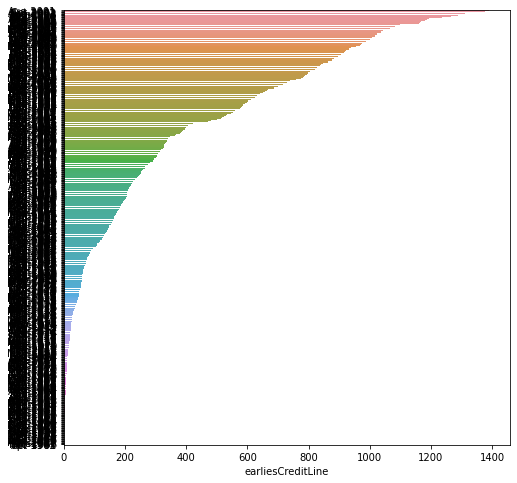

In [82]:
for fea in category_fea:
    if fea == "isDefault":
        continue
    see_NoserialCategory(fea, data_test_a)

In [83]:
train_loan_fr = data_train.loc[data_train['isDefault'] == 1]
train_loan_nofr = data_train.loc[data_train['isDefault'] == 0]

In [86]:
def seeLabel(colName):
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 8))
    train_loan_fr.groupby('{}'.format(colName))['{}'.format(colName)].count().plot(kind='barh', ax=ax1, title='Count of {} fraud'.format(colName))
    train_loan_nofr.groupby('{}'.format(colName))['{}'.format(colName)].count().plot(kind='barh', ax=ax2, title='Count of {} non-fraud'.format(colName))
    plt.show()

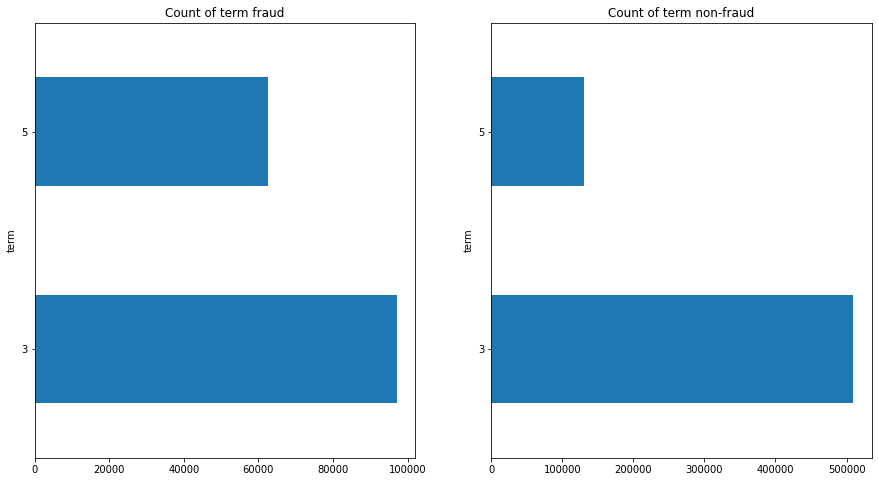

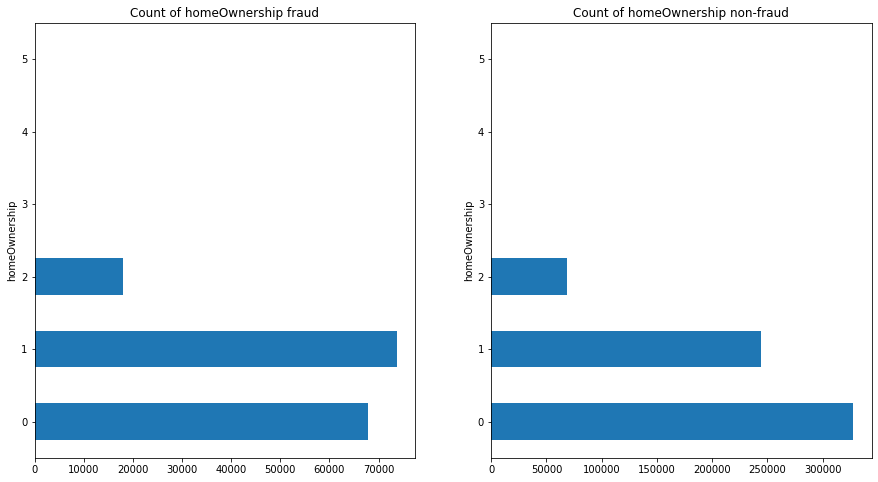

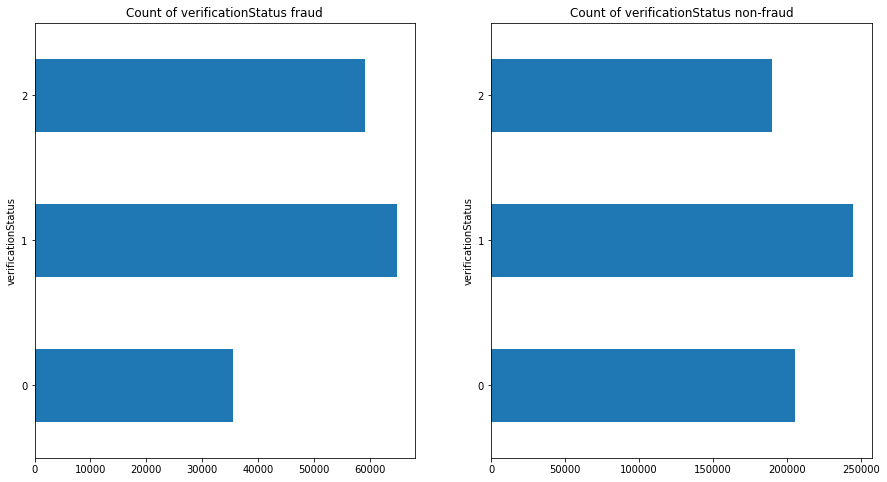

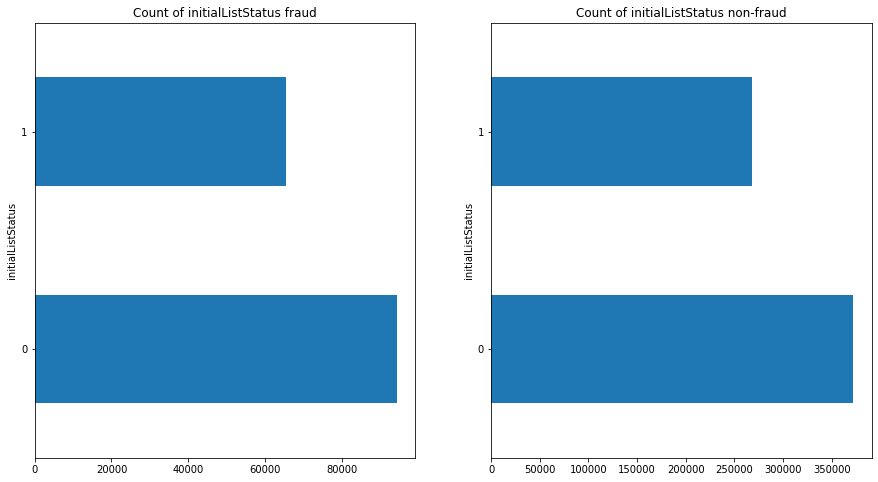

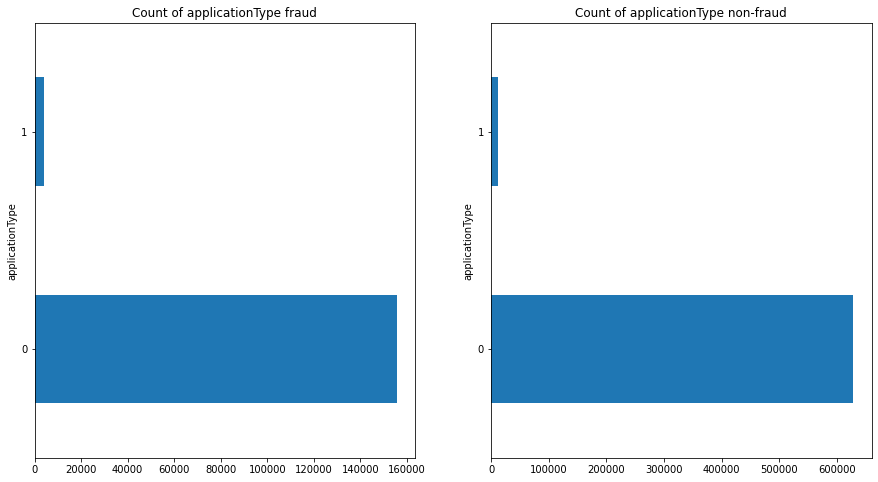

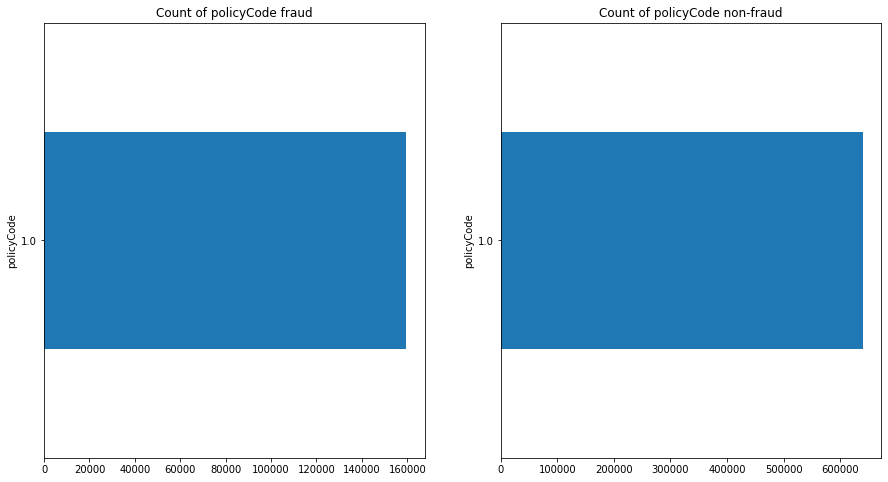

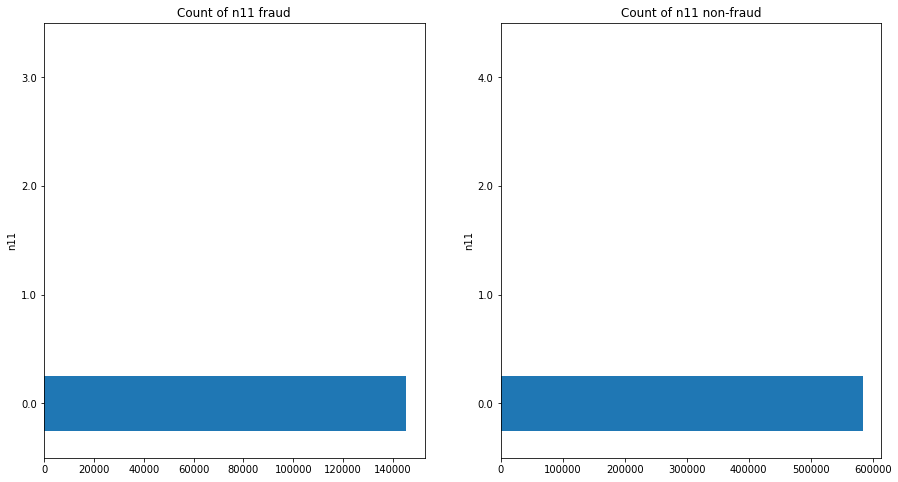

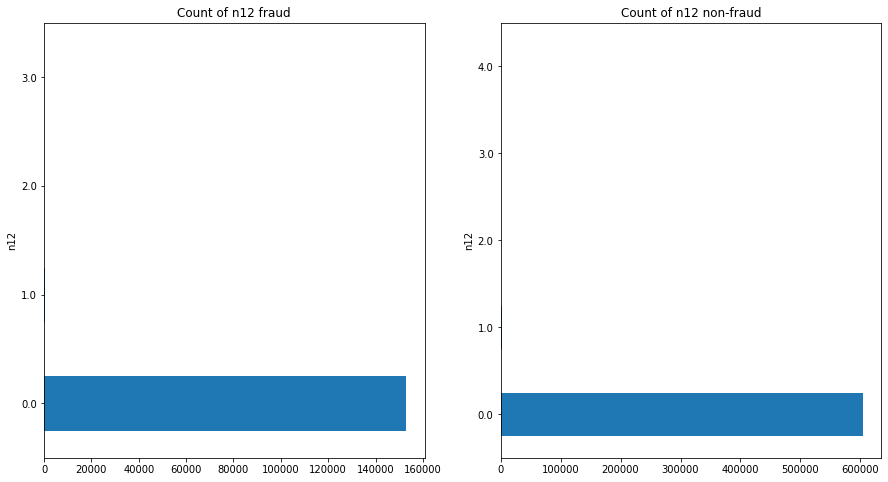

In [92]:
for fea in numerical_noserial_fea:
    if fea == "isDefault":
        continue
    seeLabel(fea)

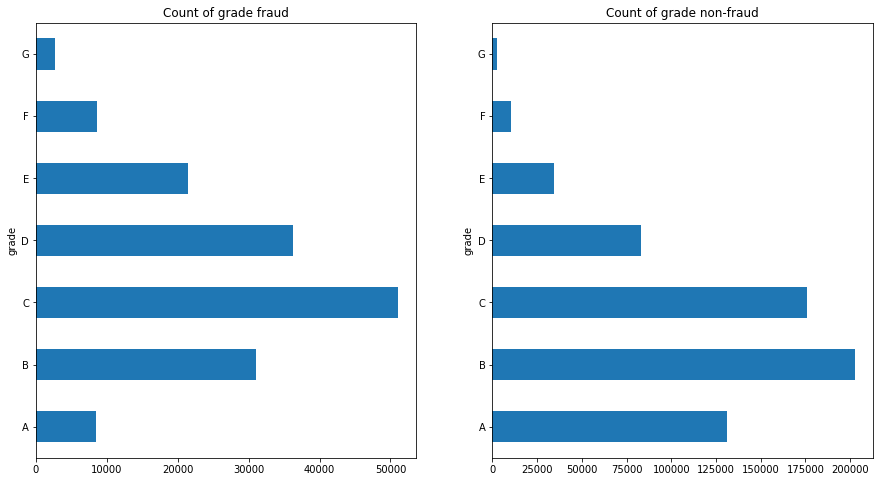

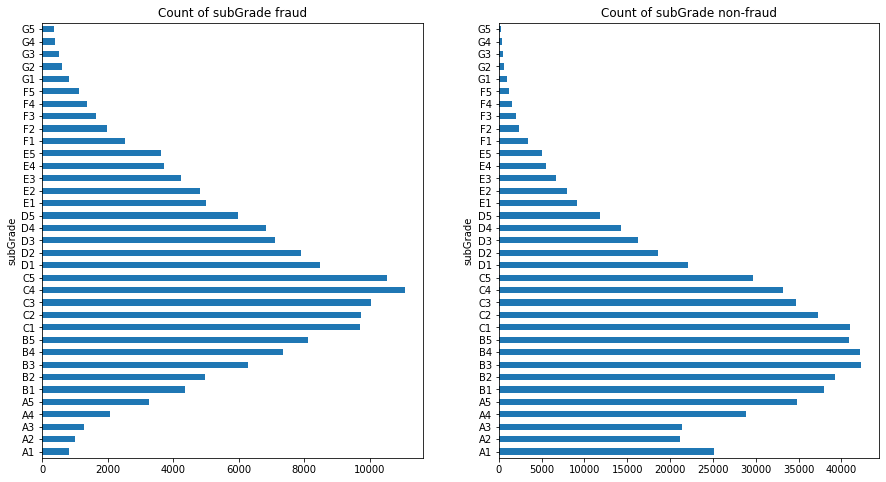

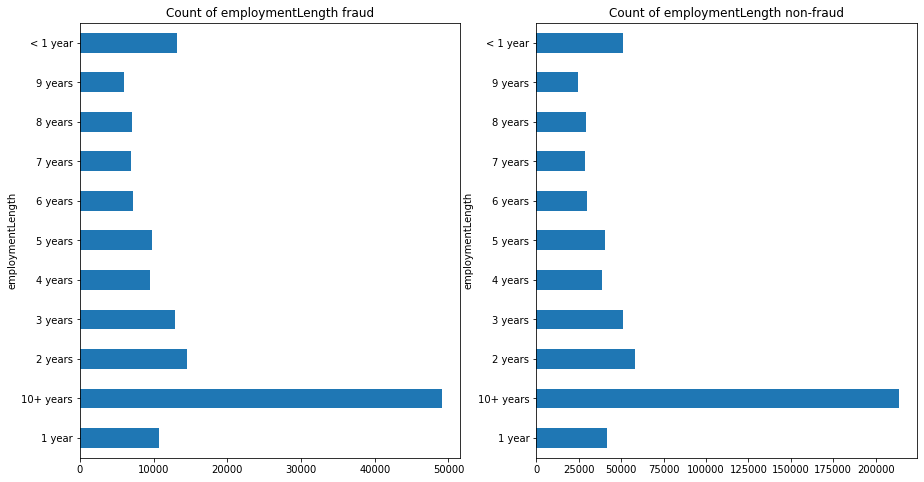

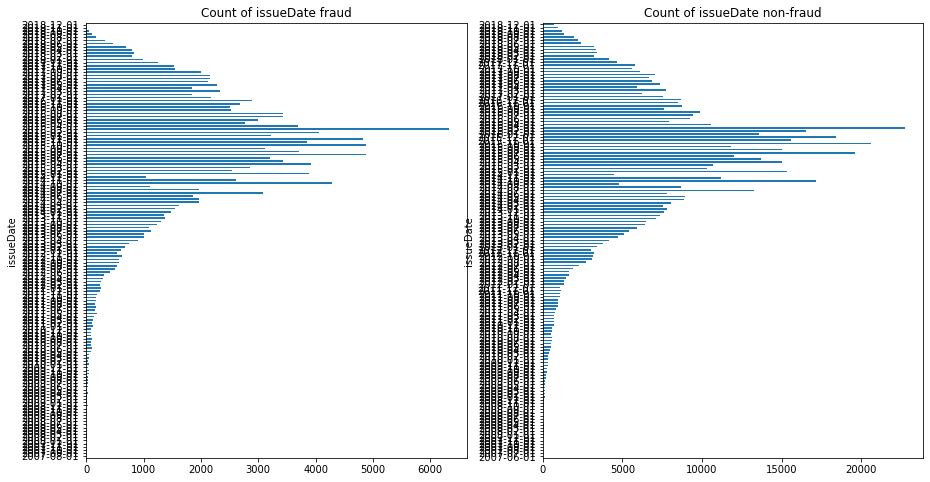

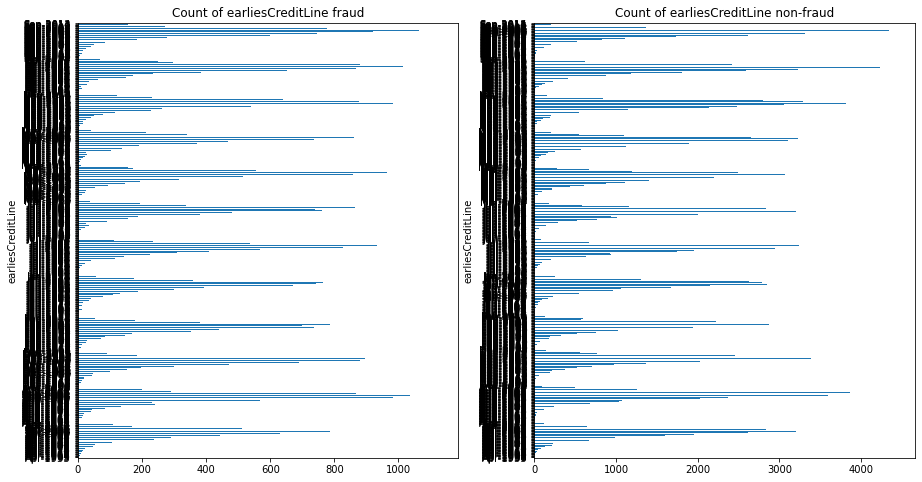

In [93]:
for fea in category_fea:
    if fea == "isDefault":
        continue
    seeLabel(fea)

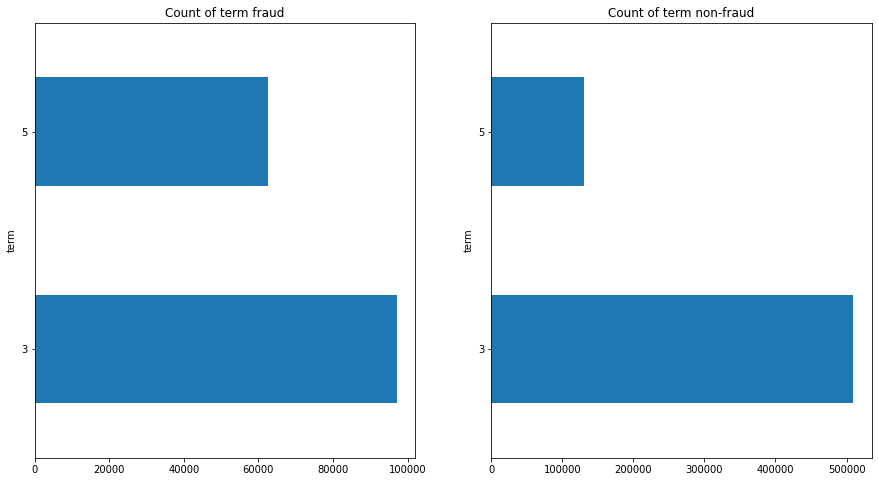

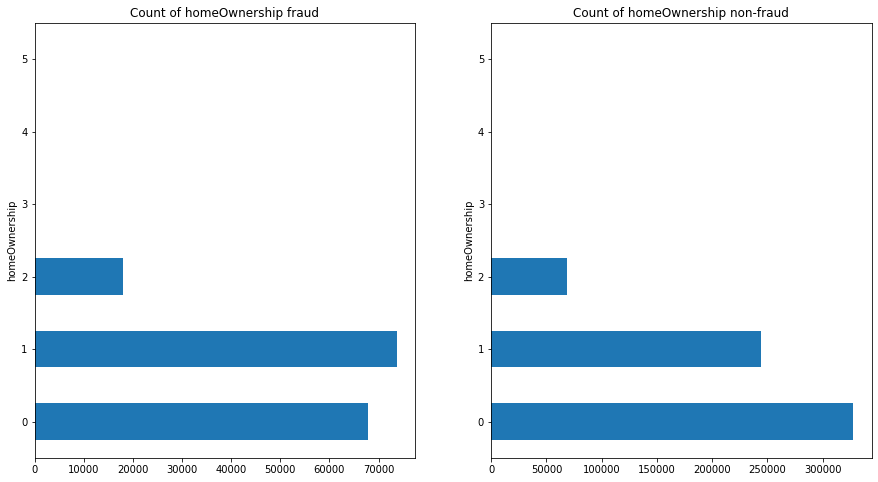

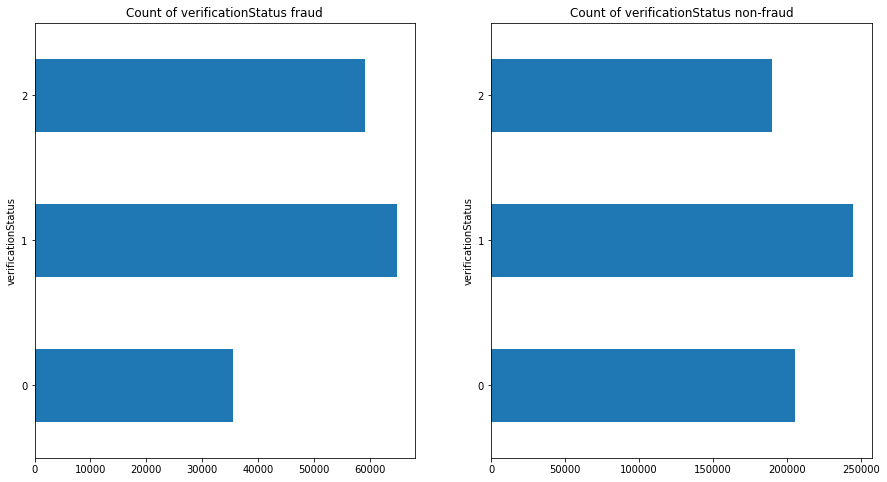

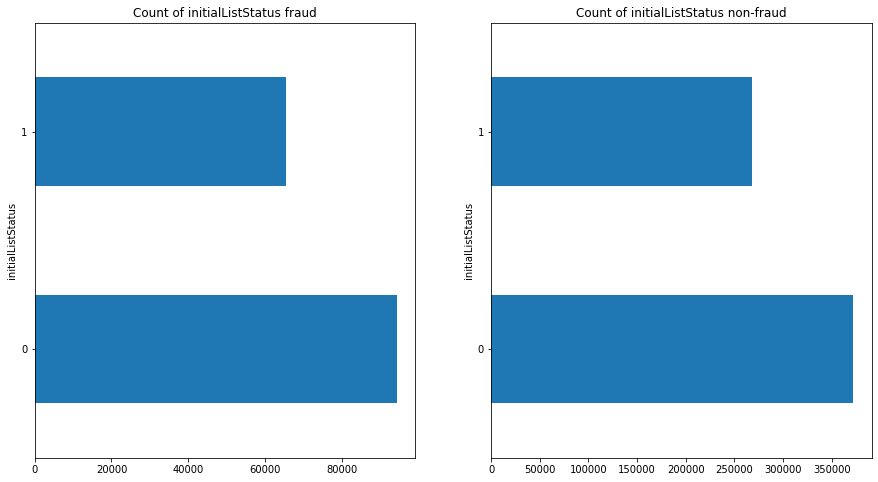

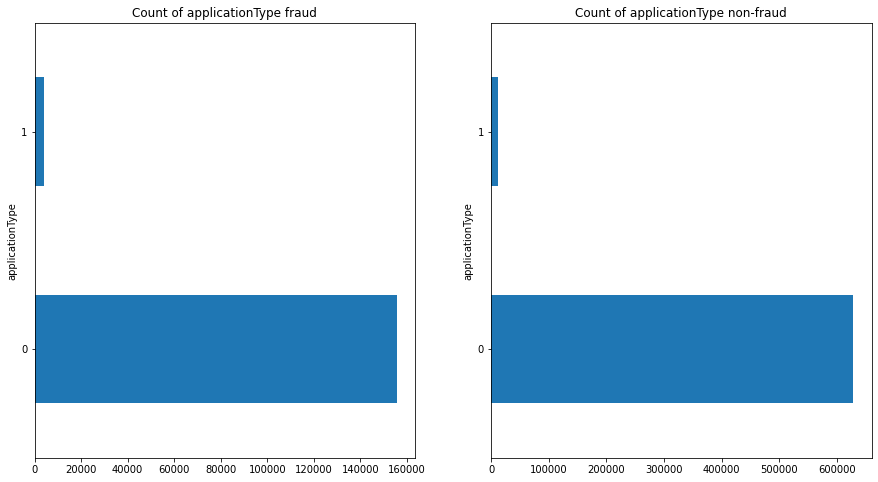

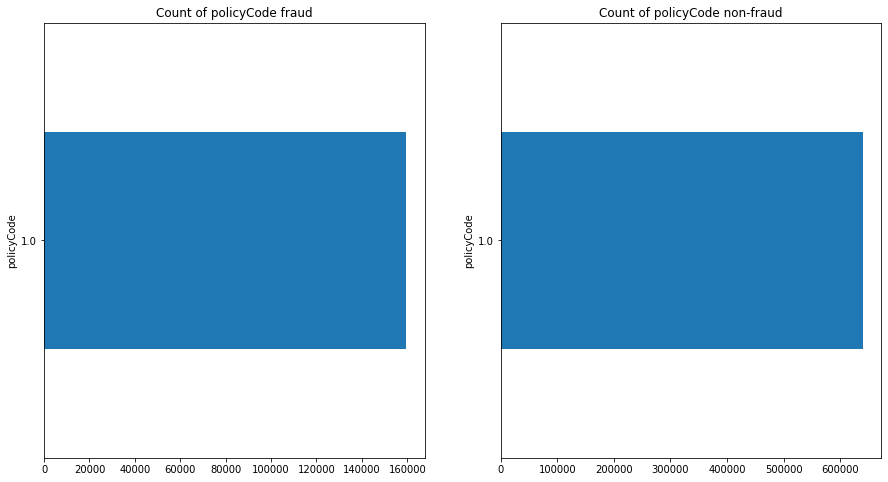

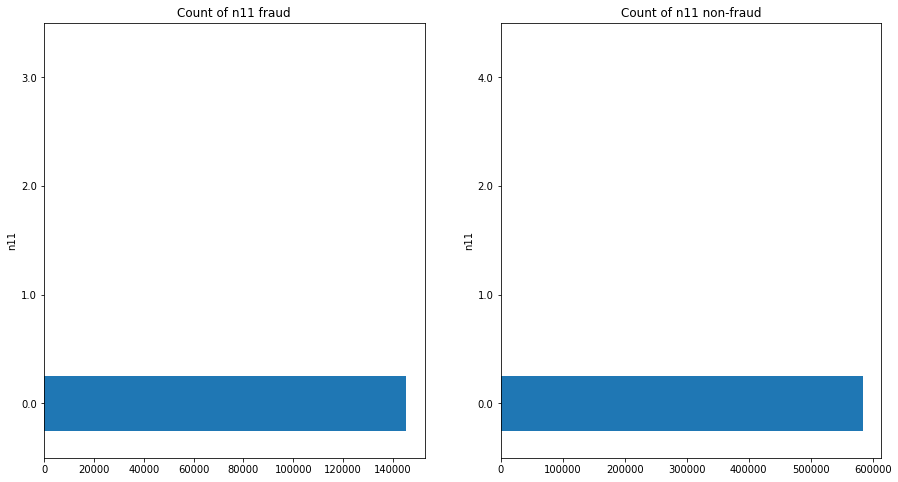

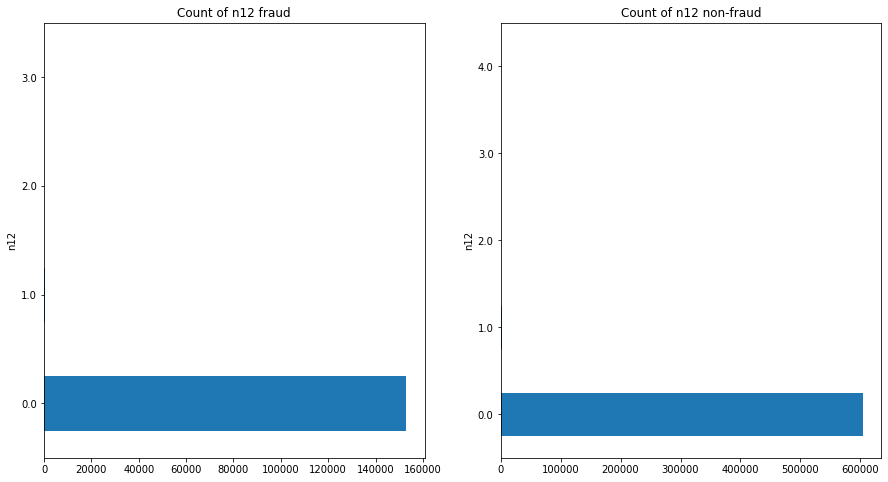

In [ ]:
for fea in numerical_noserial_fea:
    if fea == "isDefault":
        continue
    seeLabel(fea)

In [100]:
def seeNumerical(colName, data_train):
    try: 
        fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
        data_train.loc[data_train['isDefault'] == 1][colName].apply(np.log1p).plot(kind='hist',
                  bins=100,
                  title='Log {} - Fraud'.format(colName),
                  color='r',
                  xlim=(-3, 10),
                ax= ax1)
        data_train.loc[data_train['isDefault'] == 0][colName].apply(np.log1p).plot(kind='hist',
                  bins=100,
                  title='Log {} - Not Fraud'.format(colName),
                  color='b',
                  xlim=(-3, 10),
                ax=ax2)
    except:
        print(colName, "... error")

dti ... error


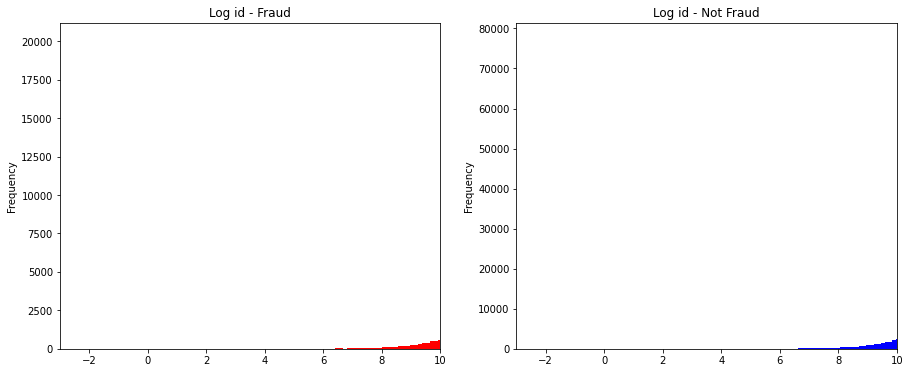

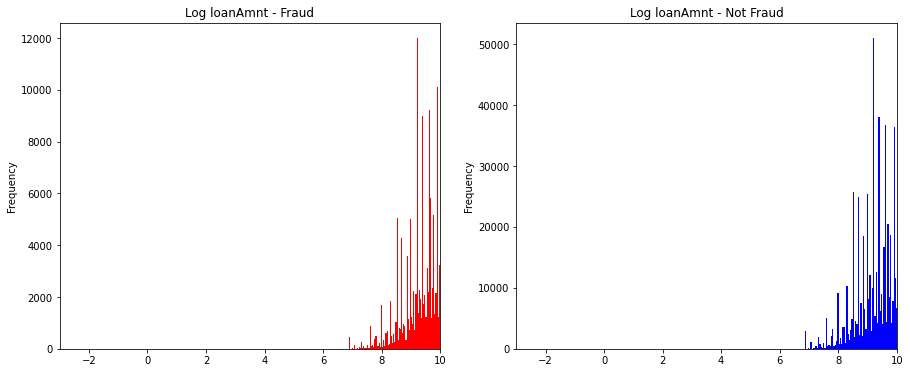

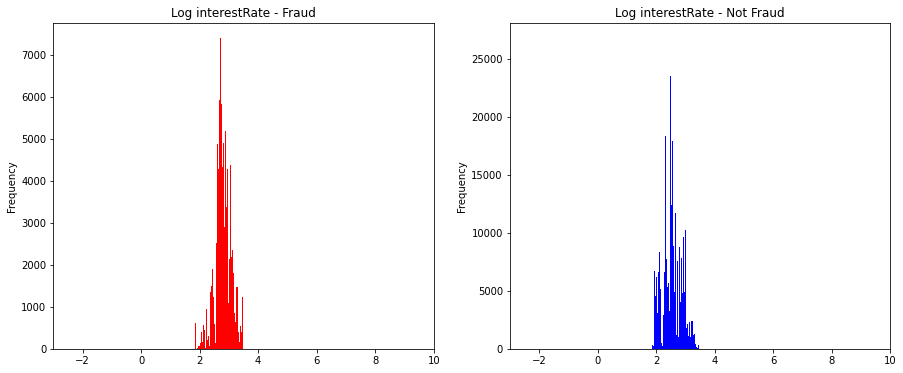

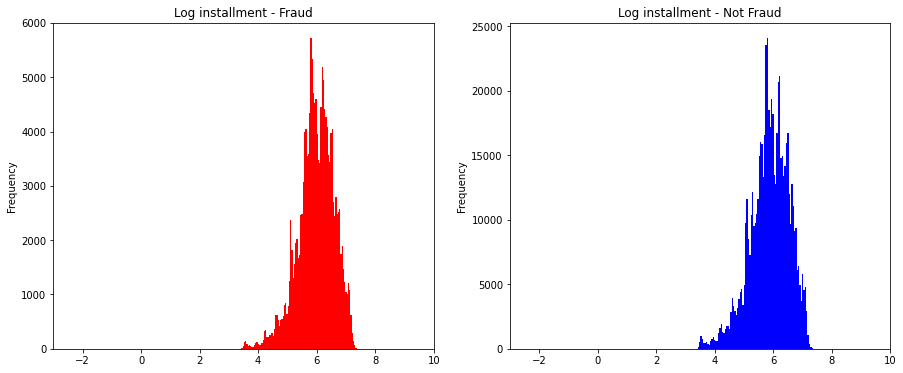

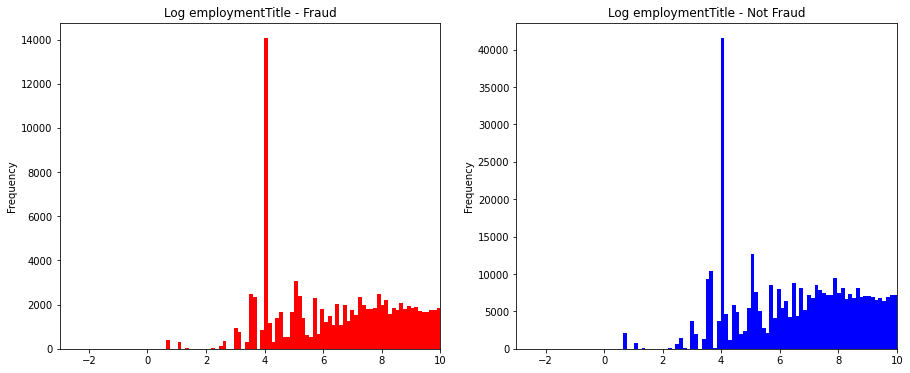

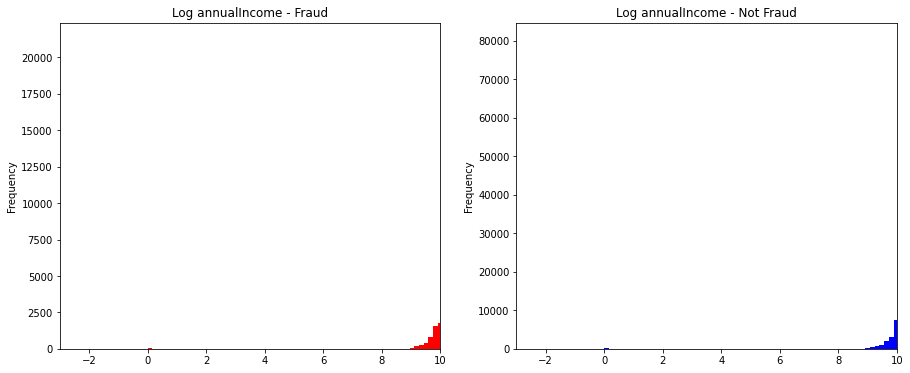

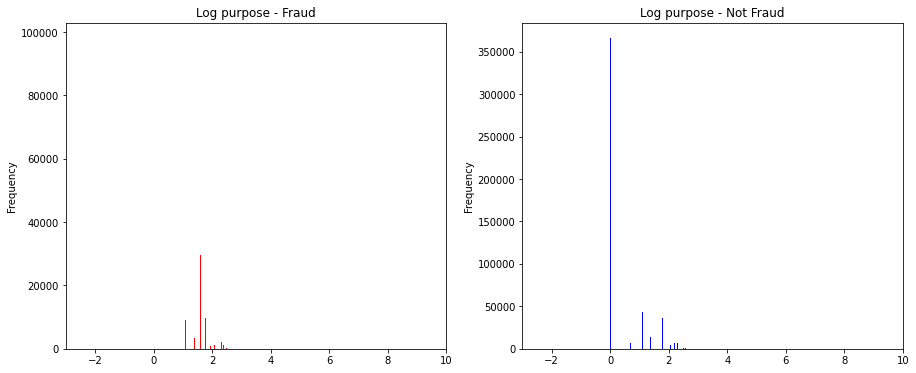

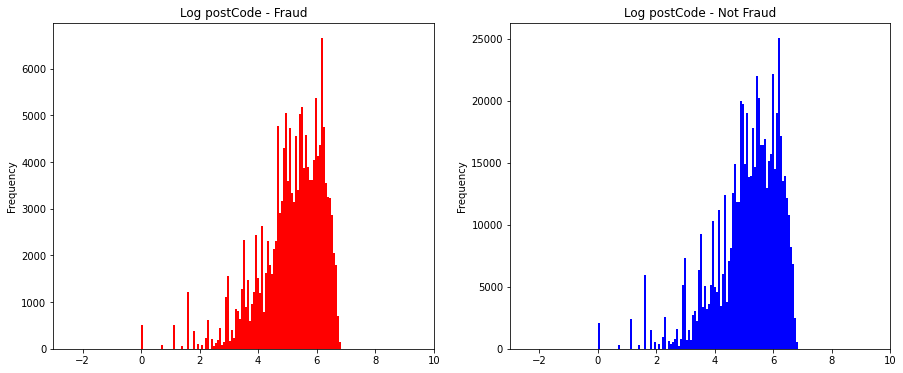

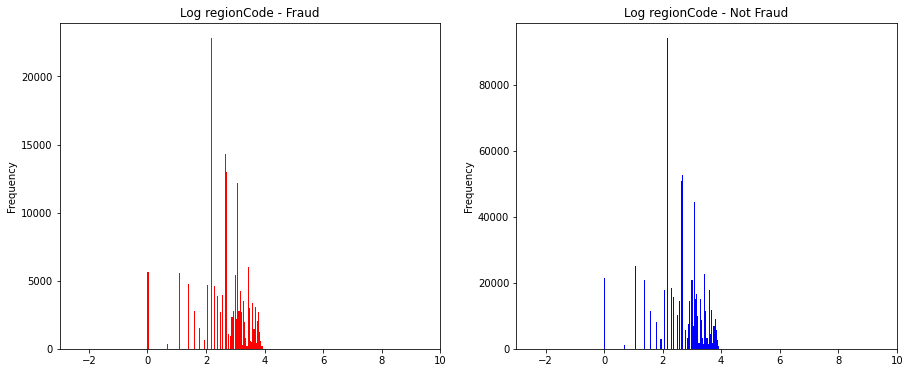

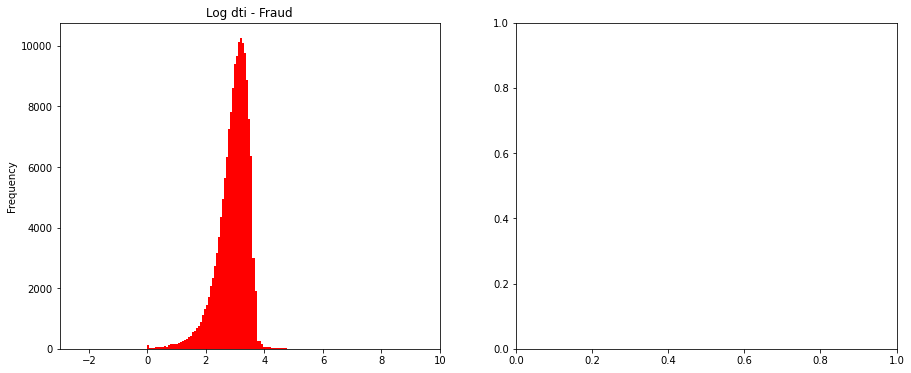

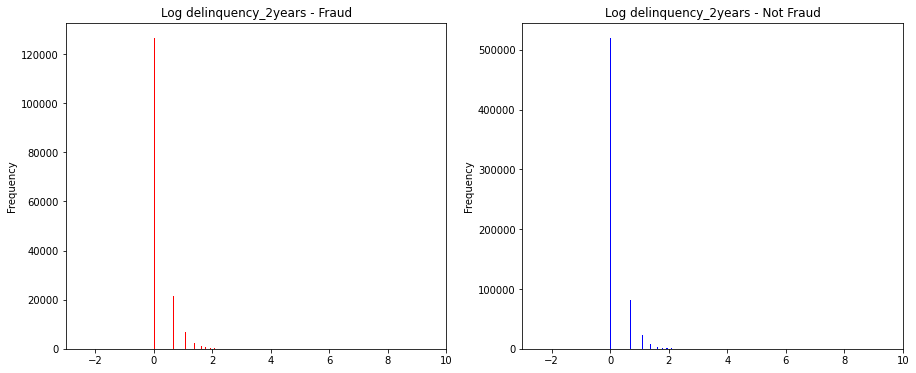

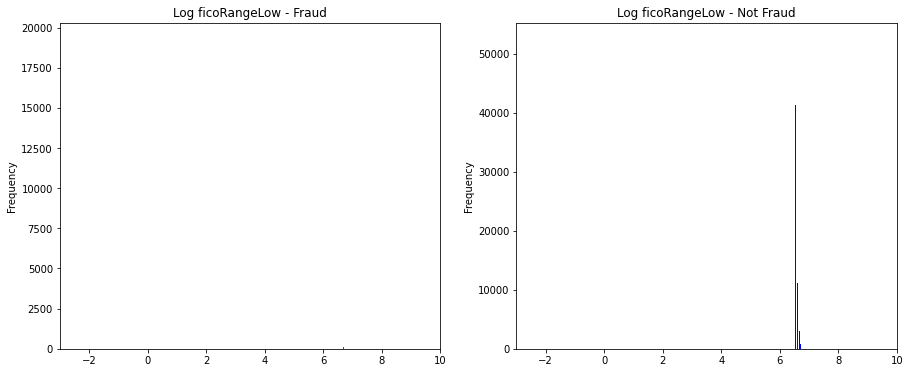

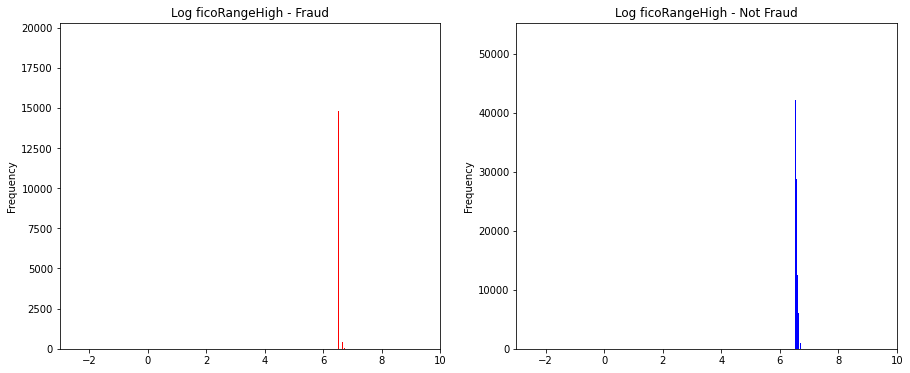

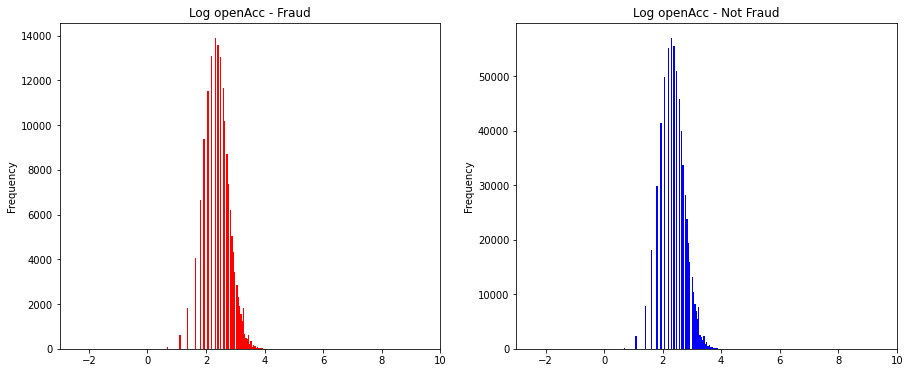

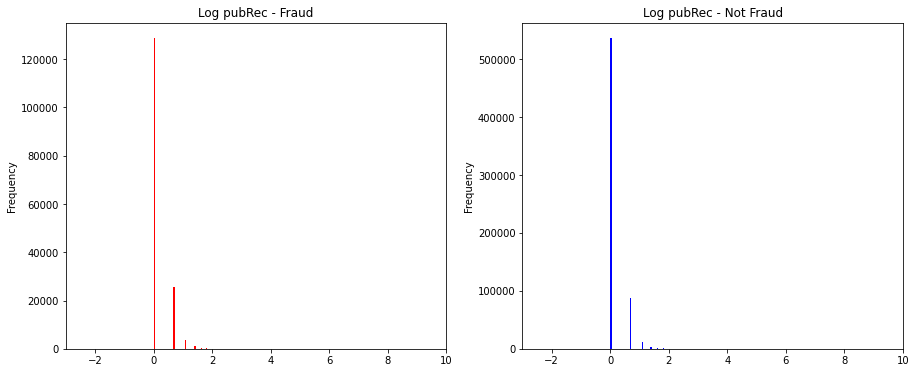

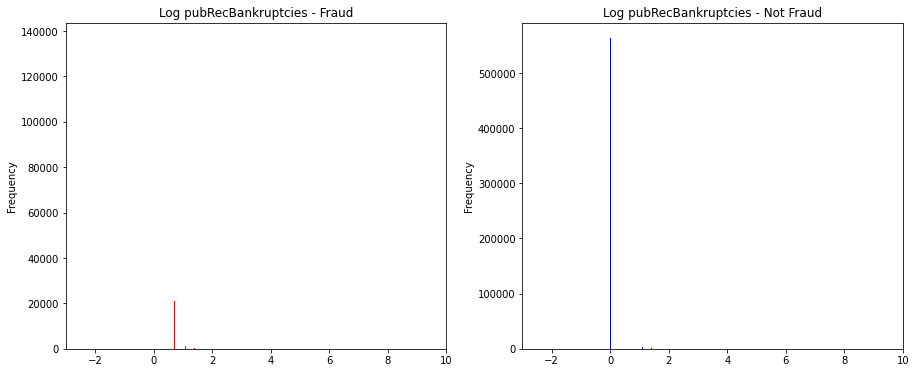

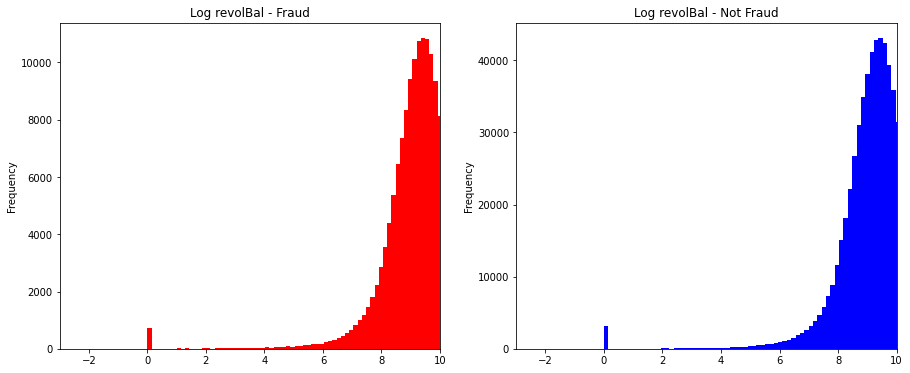

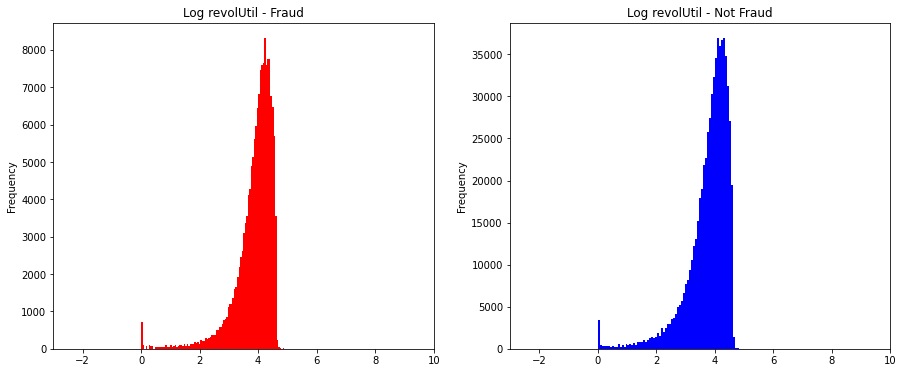

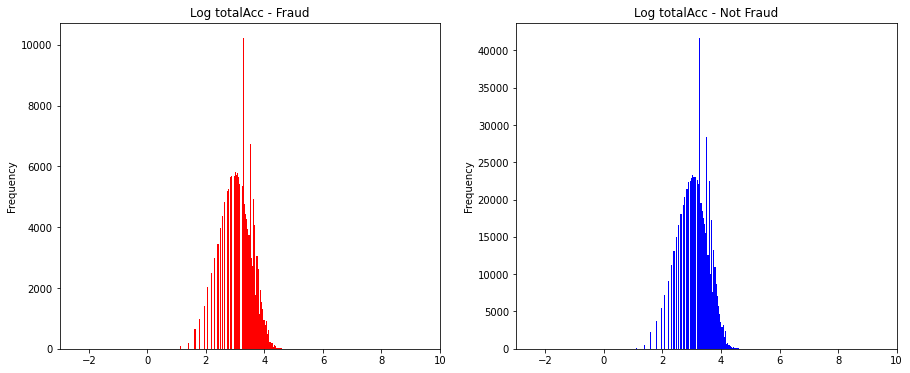

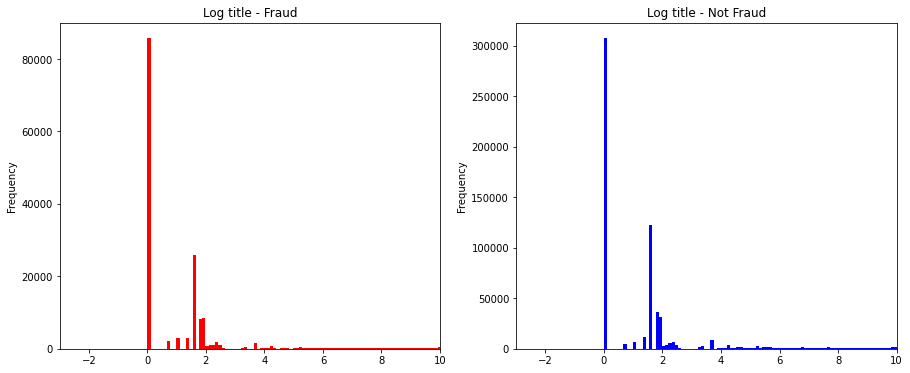

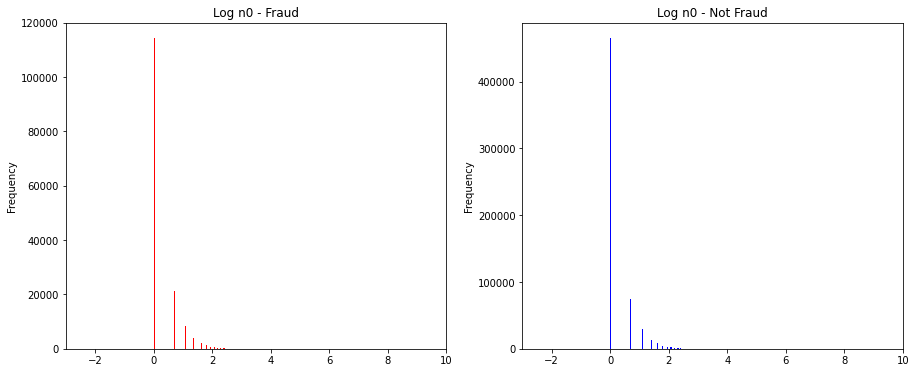

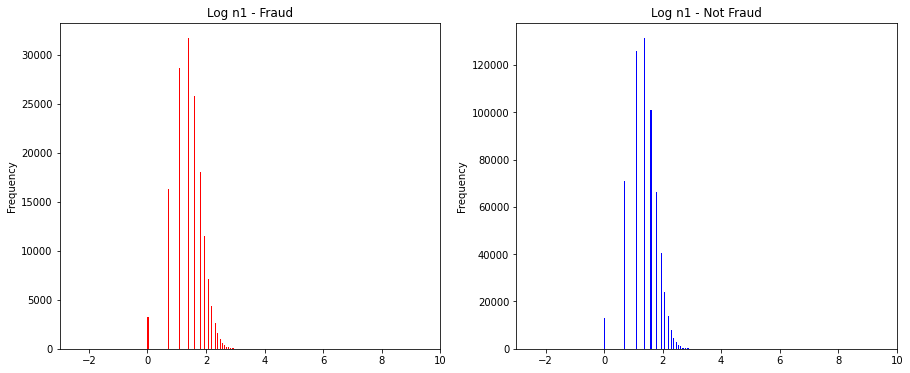

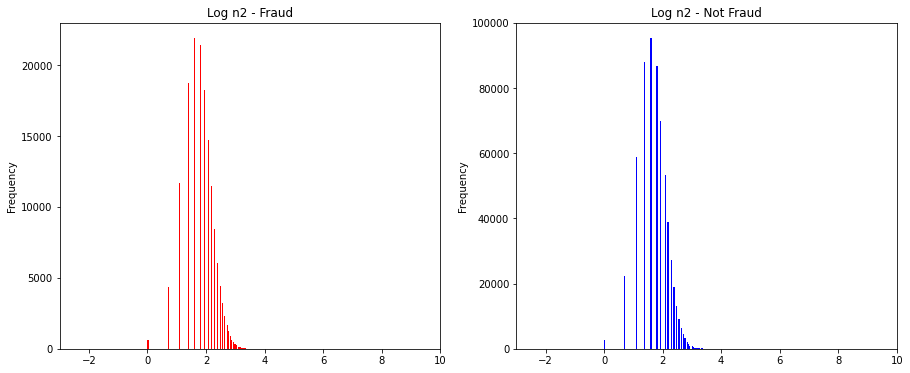

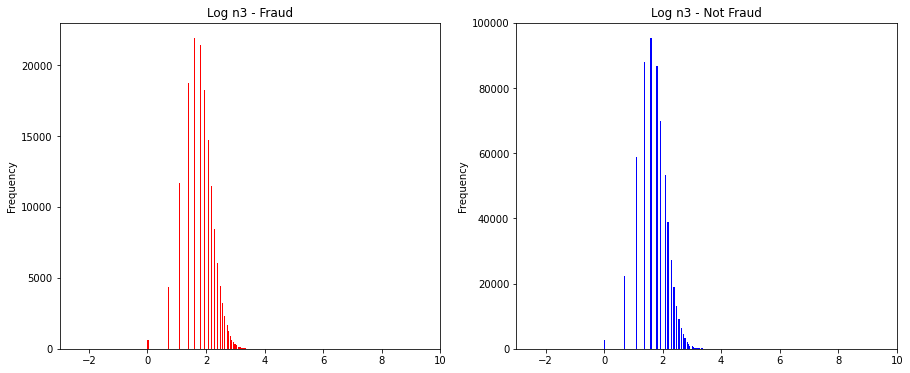

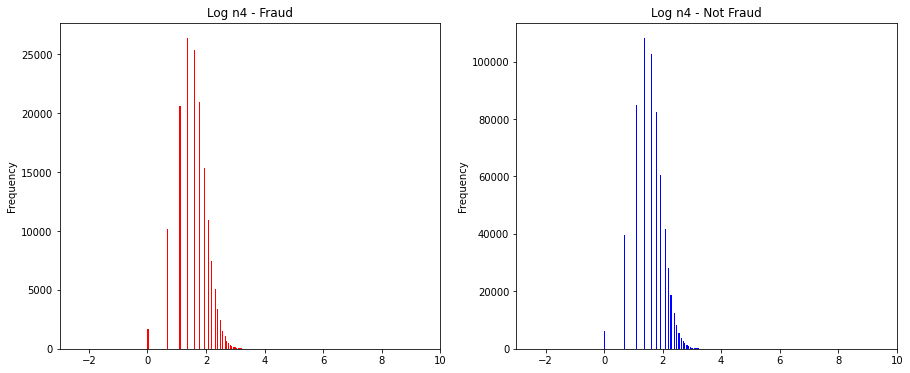

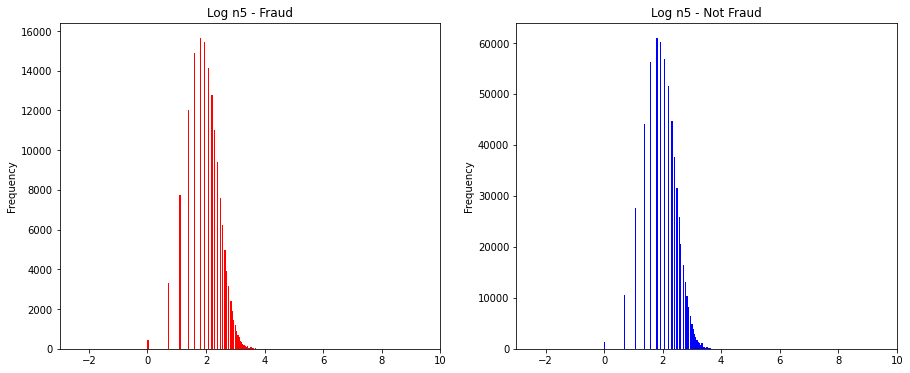

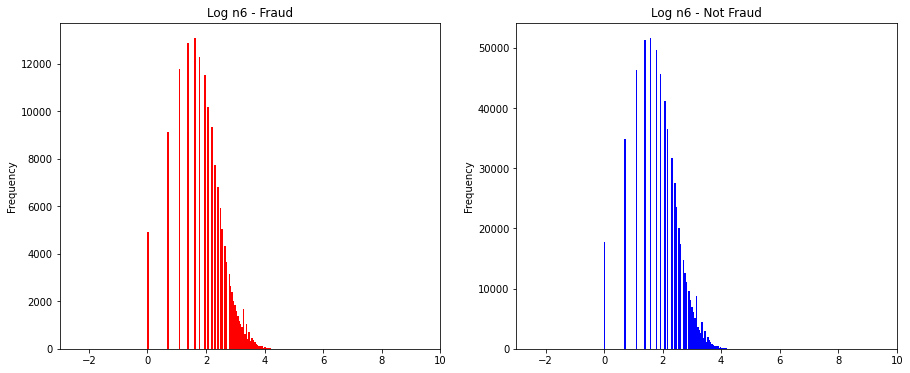

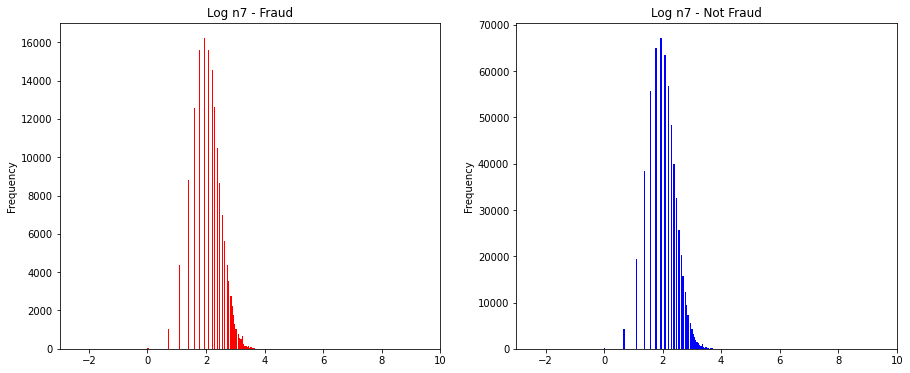

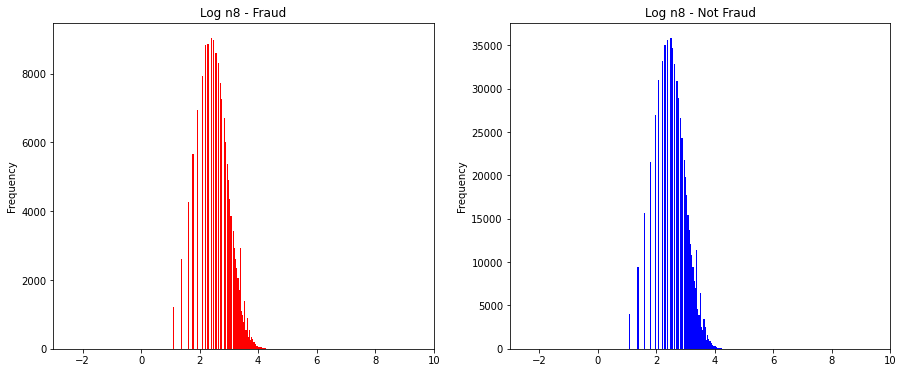

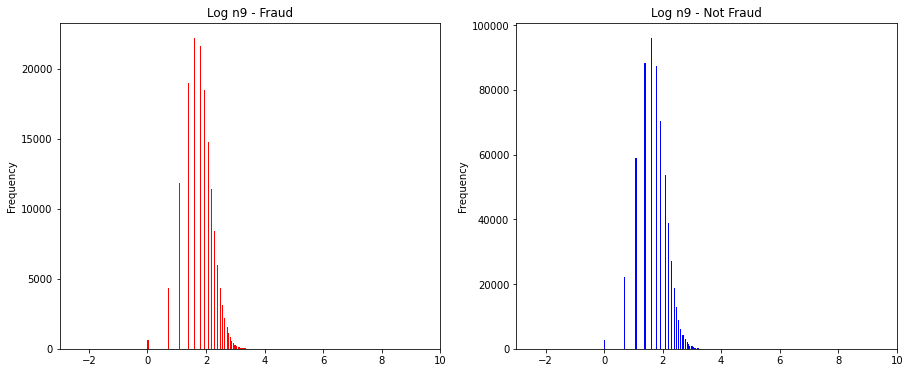

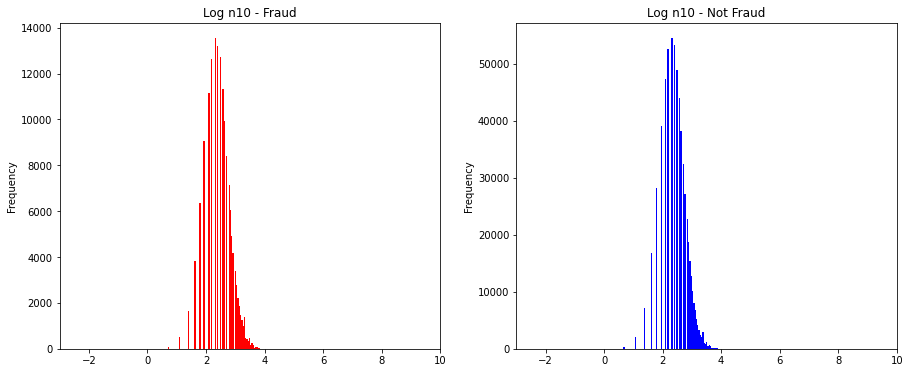

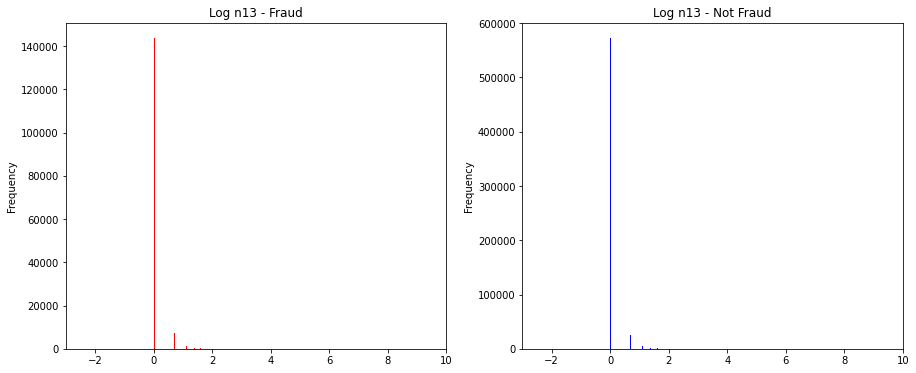

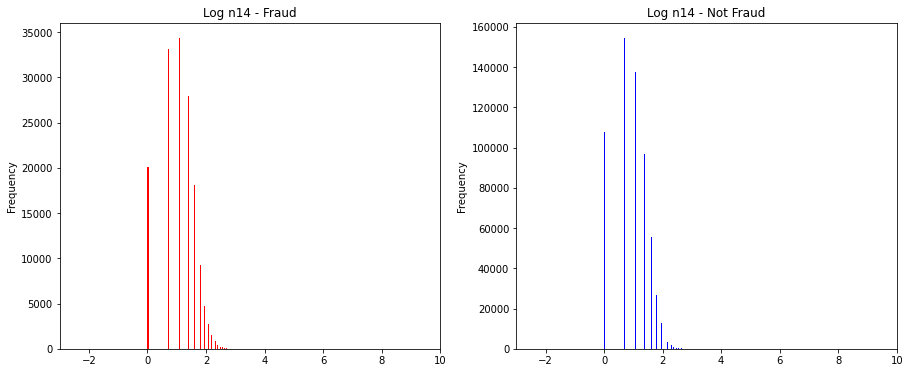

In [101]:
for fea in numerical_serial_fea:
    seeNumerical(fea, data_train)

In [31]:
print("categorical feature: \n")
print("data_train: \n")
countValues(category_fea, data_train)
print("\n\n")
print("data_test_A: \n")
countValues(category_fea, data_test_a)

categorical feature: 

data_train: 

--------grade----------
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64
--------subGrade----------
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64
--------employmentLength----------
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64
--------issueDate----------
2016-03-01    29066
2015-10-01   

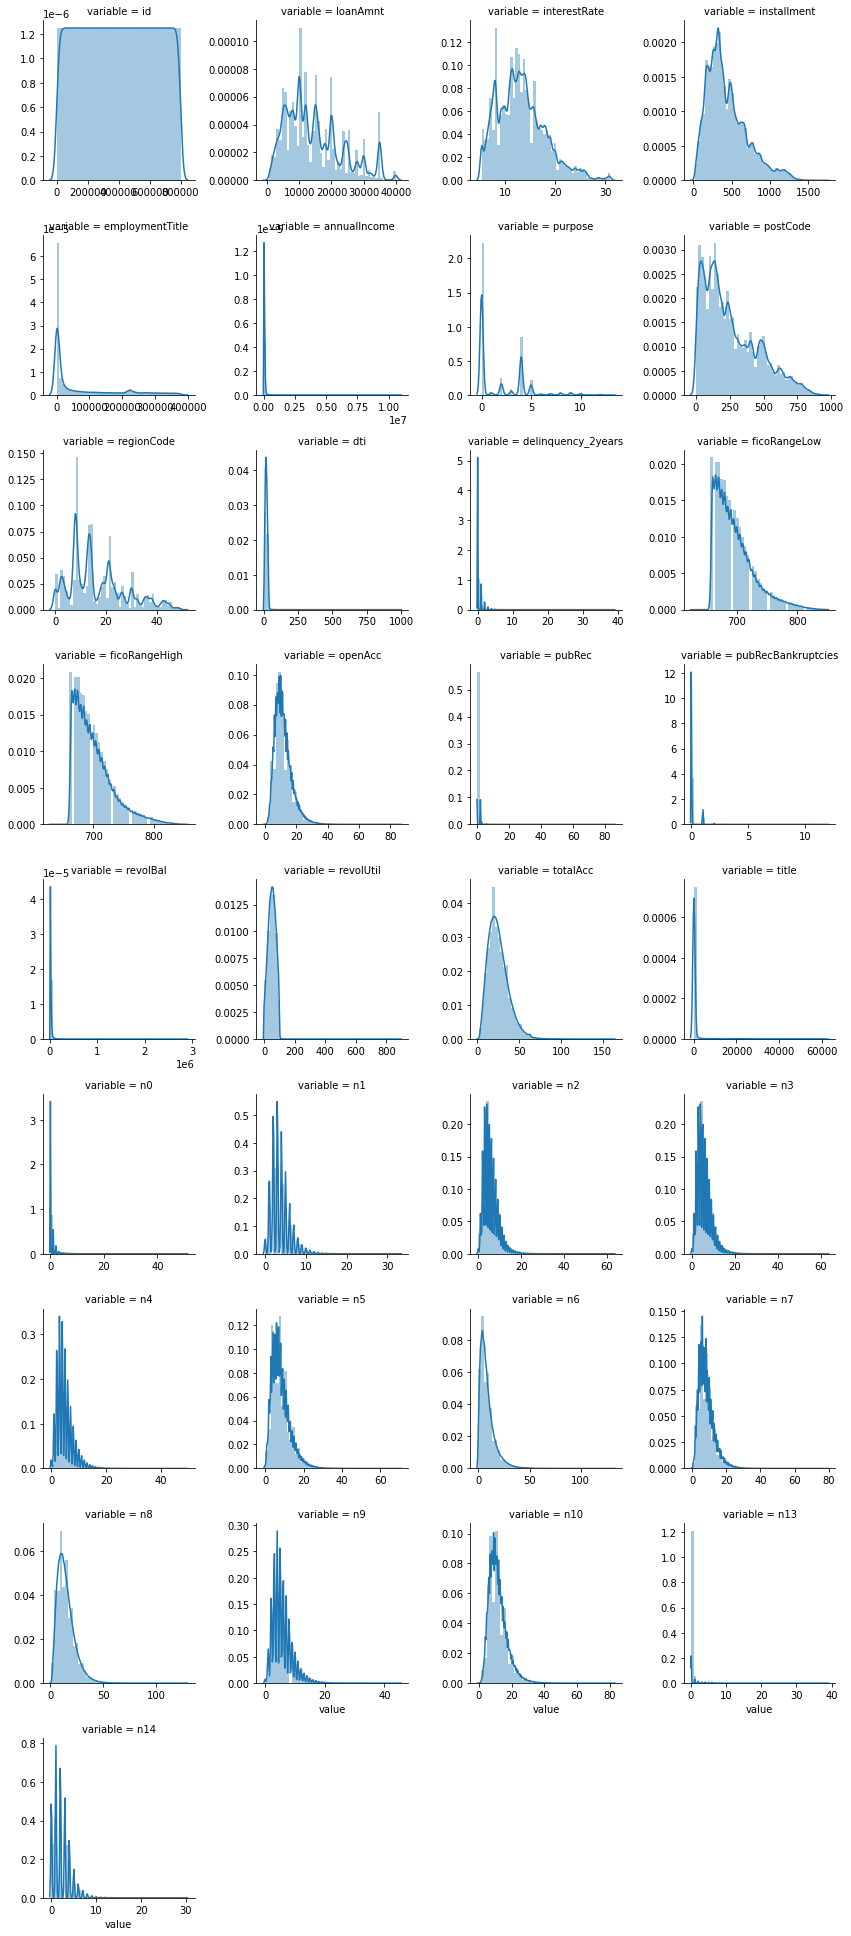

In [32]:
#每个数字特征得分布可视化
f = pd.melt(data_train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

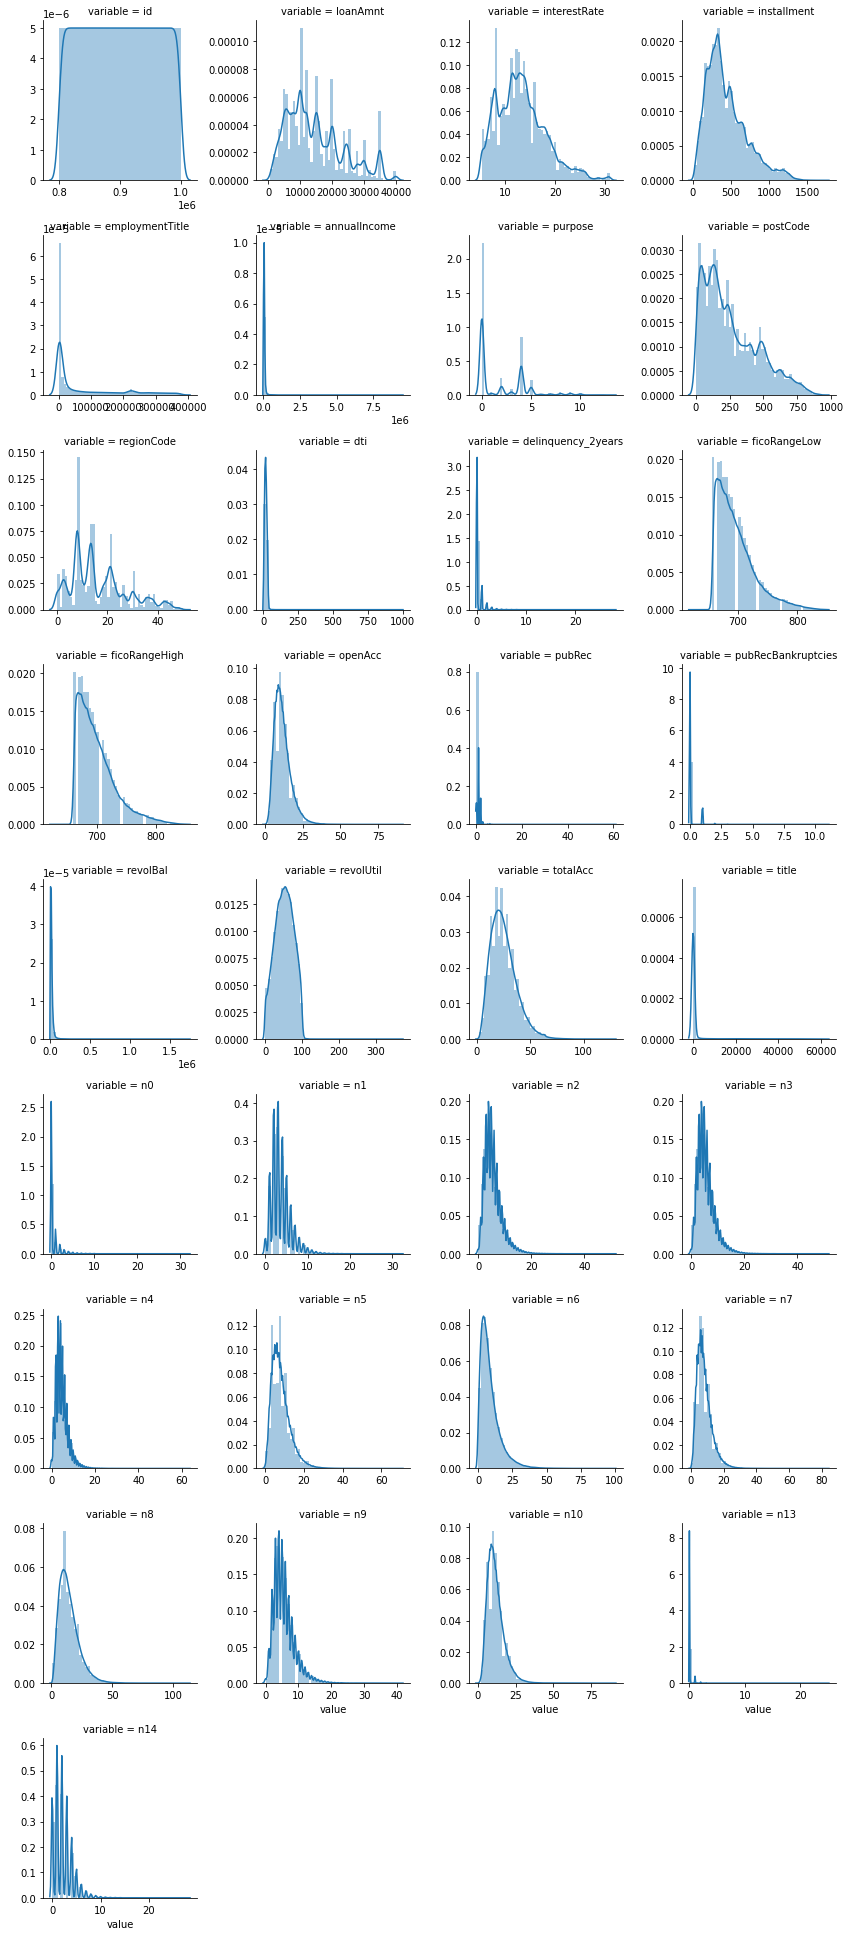

In [33]:
#每个数字特征得分布可视化
f = pd.melt(data_test_a, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [58]:
def seeLogged(columnName, data_train): 
    try: 
        #Ploting Transaction Amount Values Distribution
        plt.figure(figsize=(16,12))
        plt.suptitle('Transaction Values Distribution', fontsize=22)
        plt.subplot(221)
        sub_plot_1 = sns.distplot(data_train['{}'.format(columnName)])
        sub_plot_1.set_title("{} Distribuition".format(columnName), fontsize=18)
        sub_plot_1.set_xlabel("")
        sub_plot_1.set_ylabel("Probability", fontsize=15)

        plt.subplot(222)
        sub_plot_2 = sns.distplot(np.log1p(data_train['{}'.format(columnName)]))
        sub_plot_2.set_title("{} (Log) Distribuition".format(columnName), fontsize=18)
        sub_plot_2.set_xlabel("")
        sub_plot_2.set_ylabel("Probability", fontsize=15)
    except:
        pass

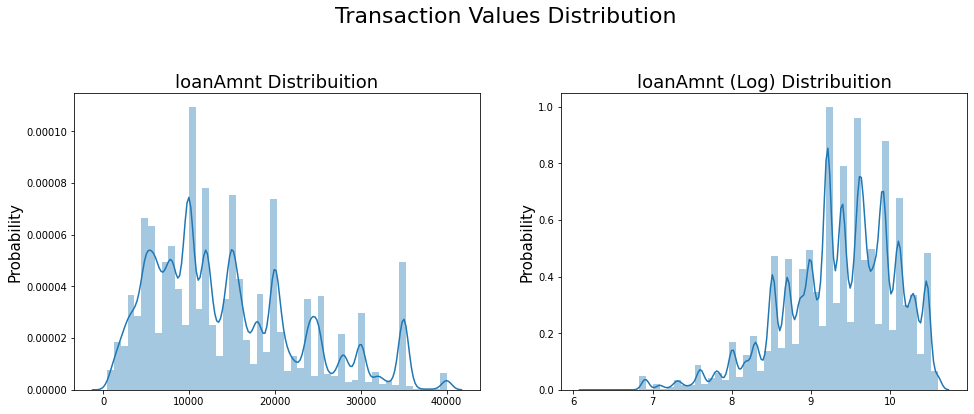

In [59]:
seeLogged("loanAmnt", data_train)

In [60]:
heheda = data_train["dti"]

In [61]:
heheda1 = np.log1p(heheda)

In [62]:
heheda1.value_counts()

3.005683    593
2.944439    585
2.653242    570
2.879198    564
2.734368    554
           ... 
5.446780      1
4.434382      1
4.436988      1
4.036186      1
4.617494      1
Name: dti, Length: 6321, dtype: int64

下面这个代码，有一点问题，就是哈，有的列，log过之后会莫名出现什么infinity什么的。。。于是我给`seeLogged`方法写了一个try except，直接忽略掉这些问题。

大图就是爽。有的列，一看就知道，log之后，就更正态了。

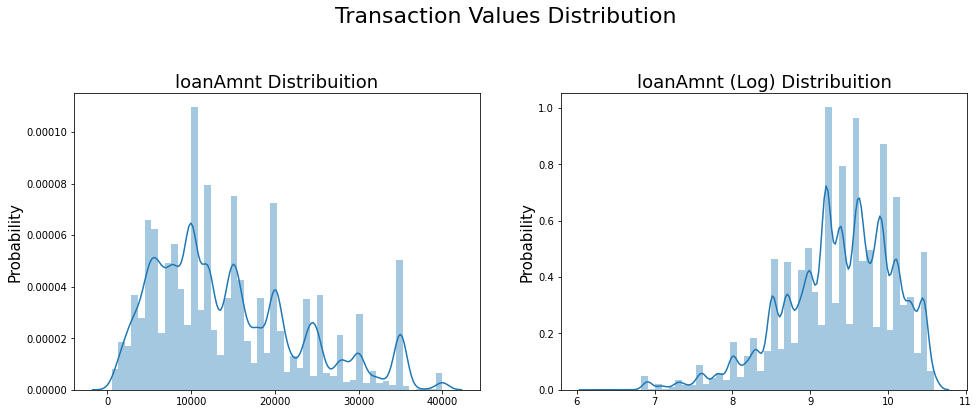

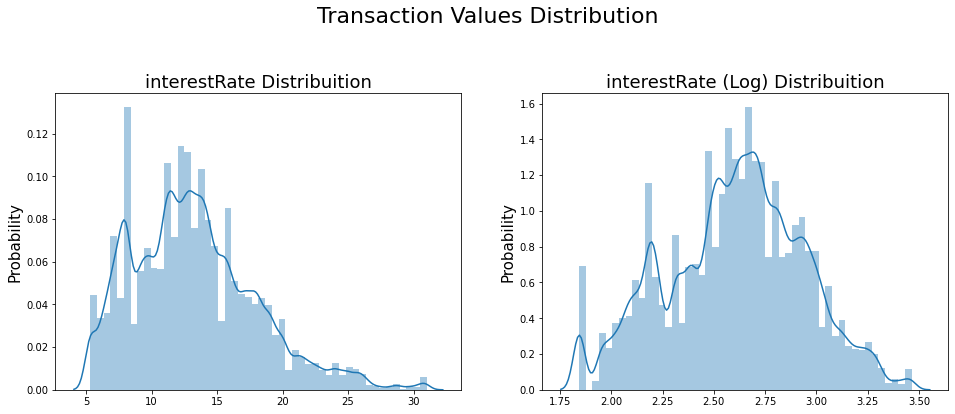

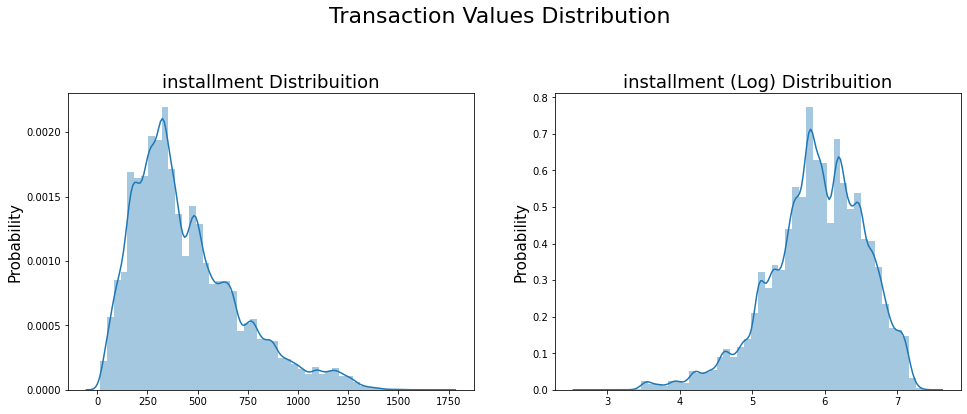

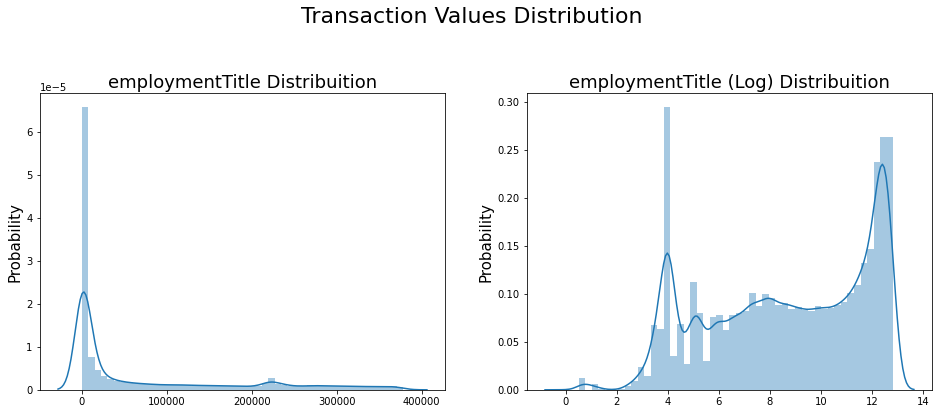

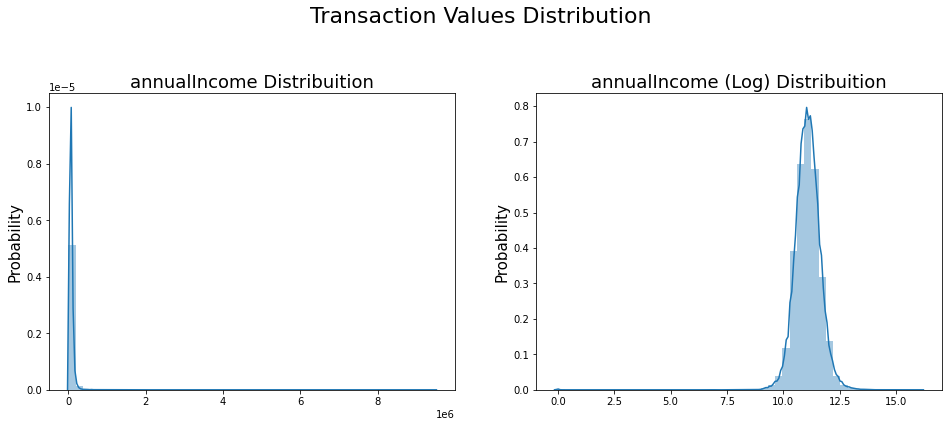

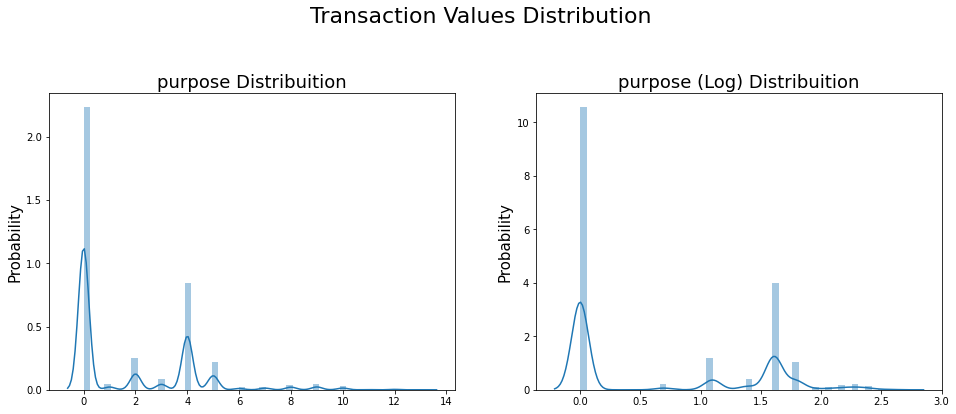

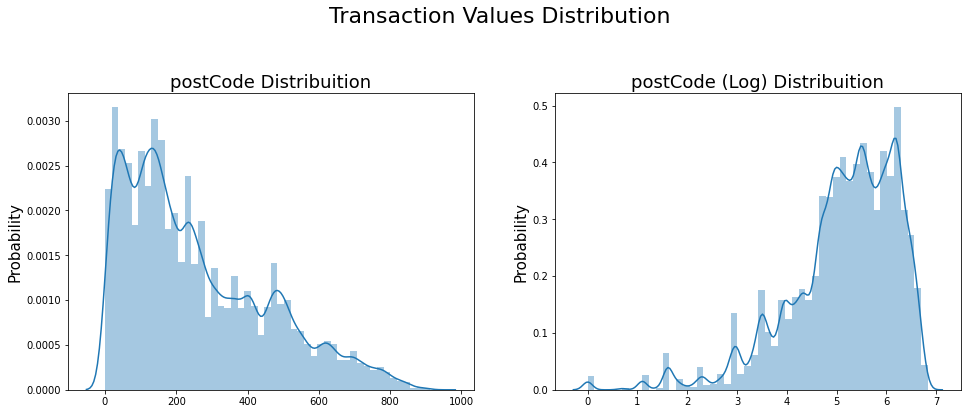

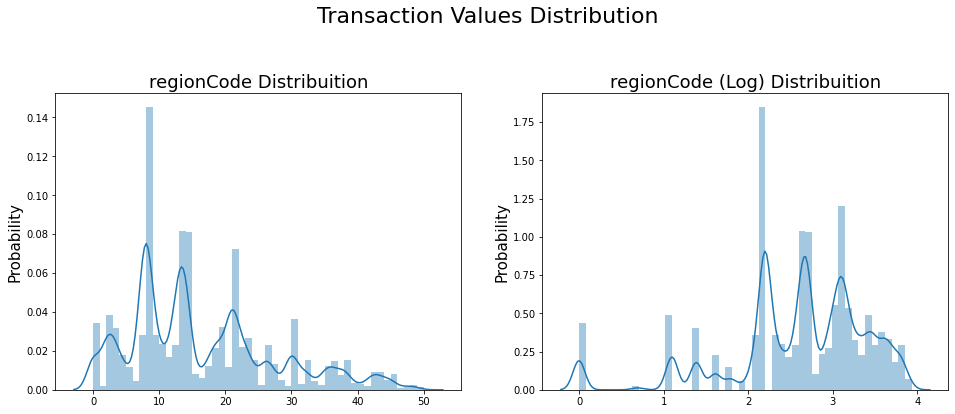

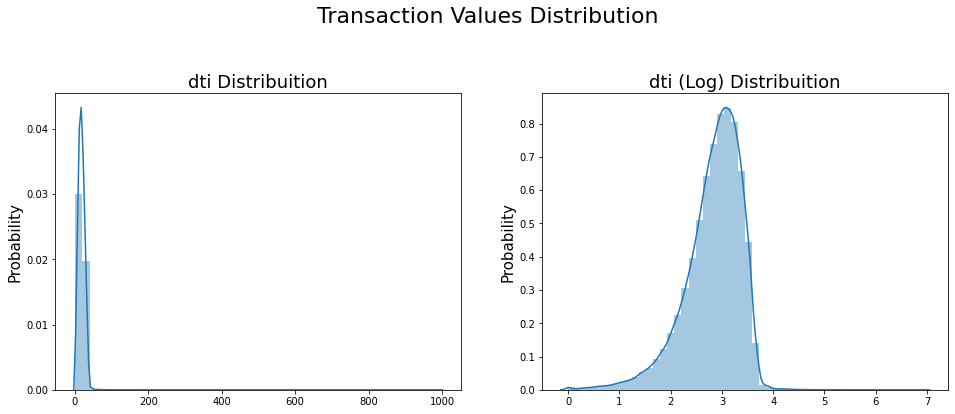

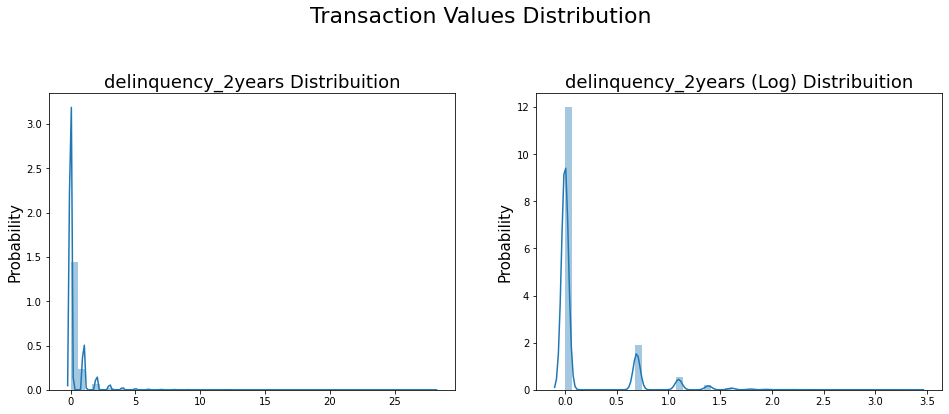

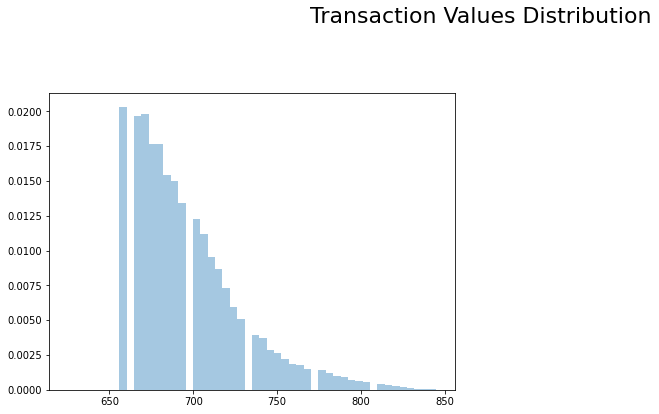

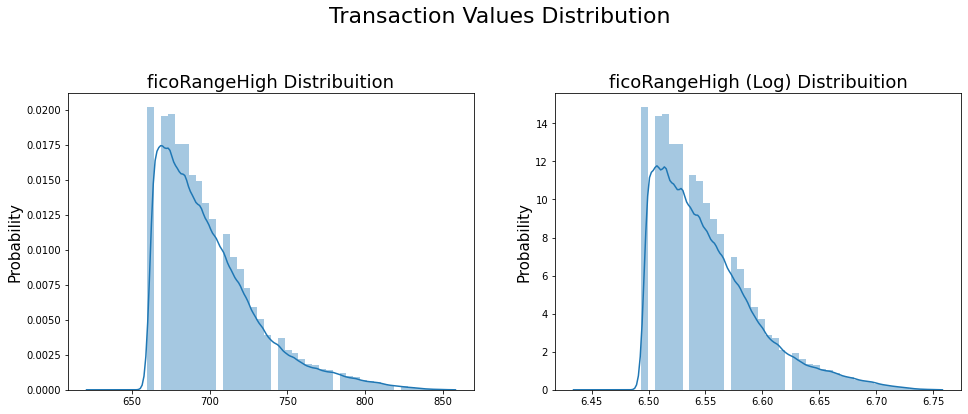

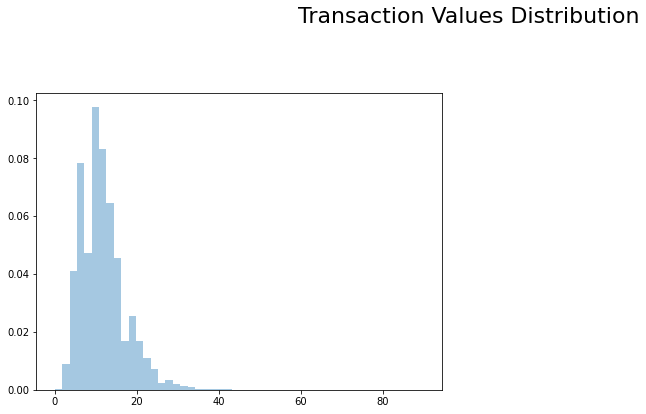

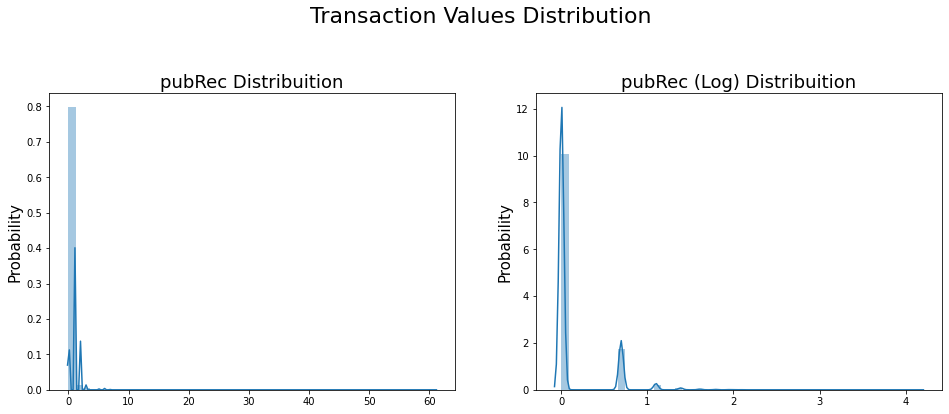

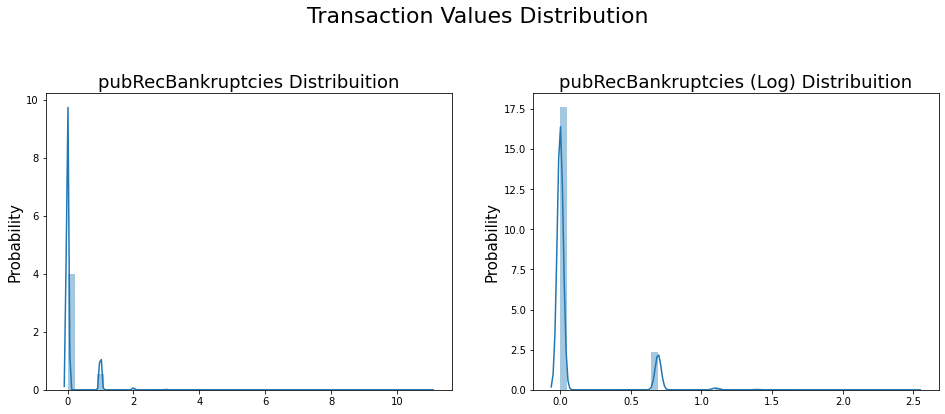

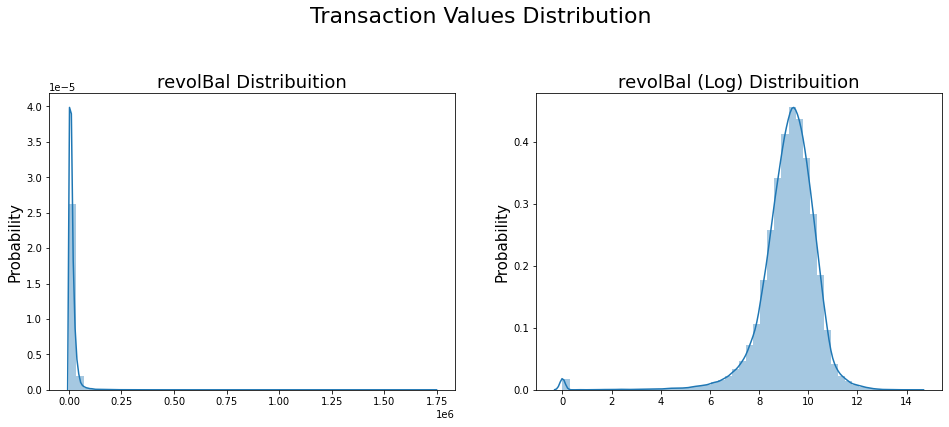

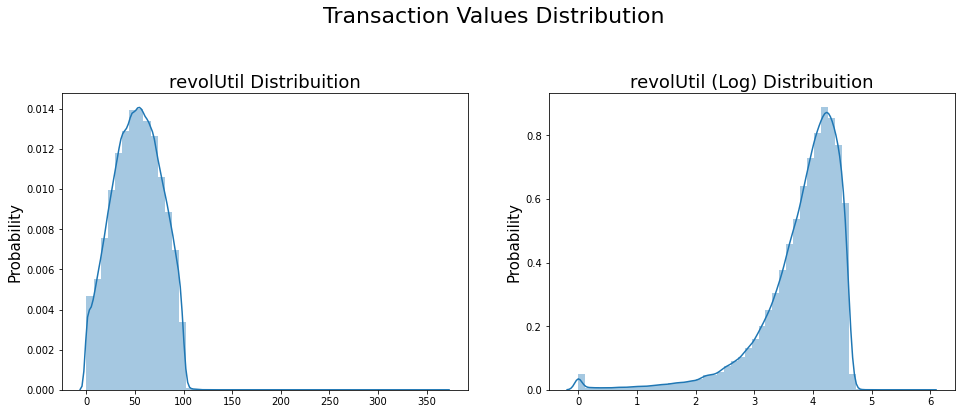

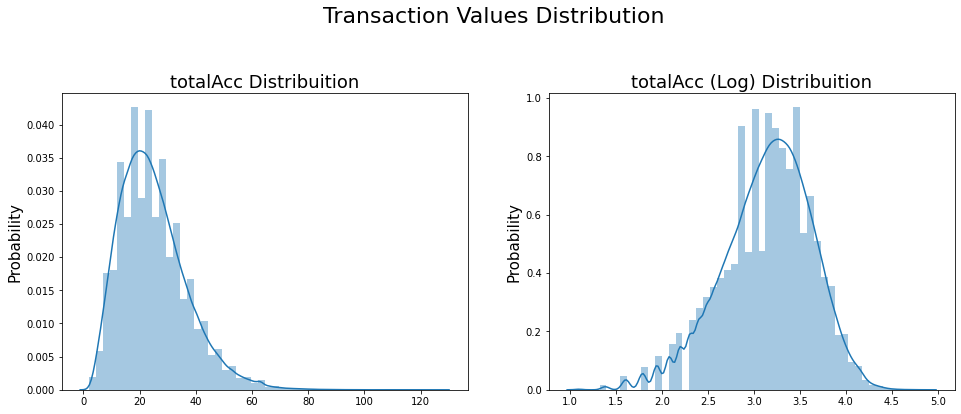

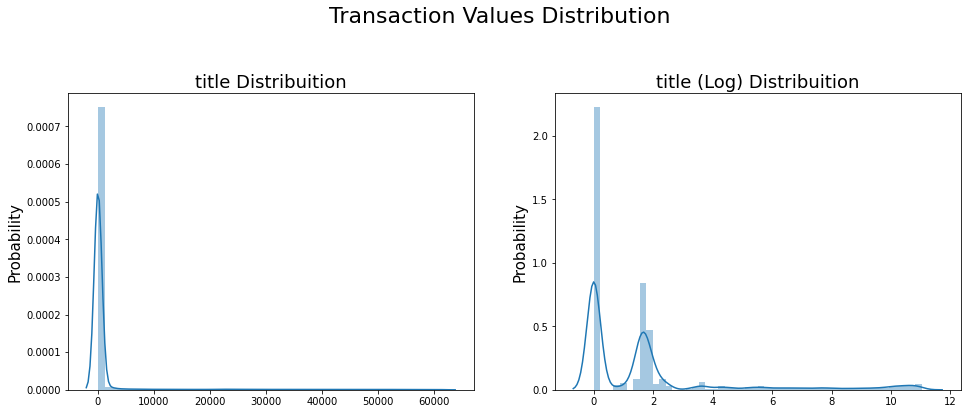

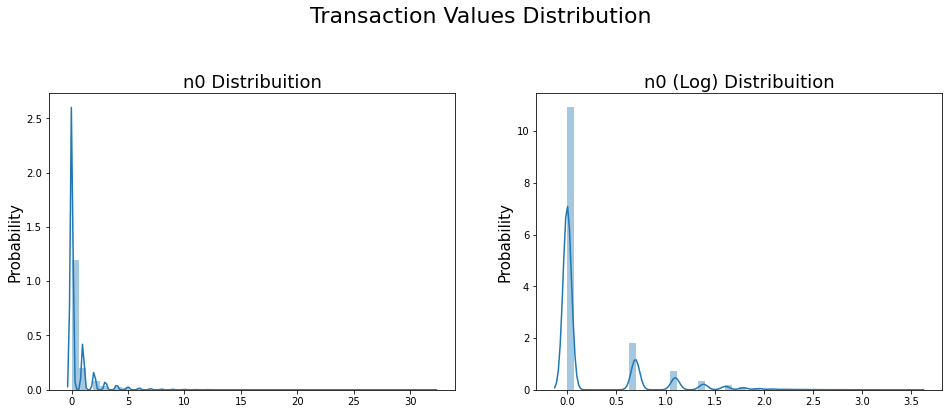

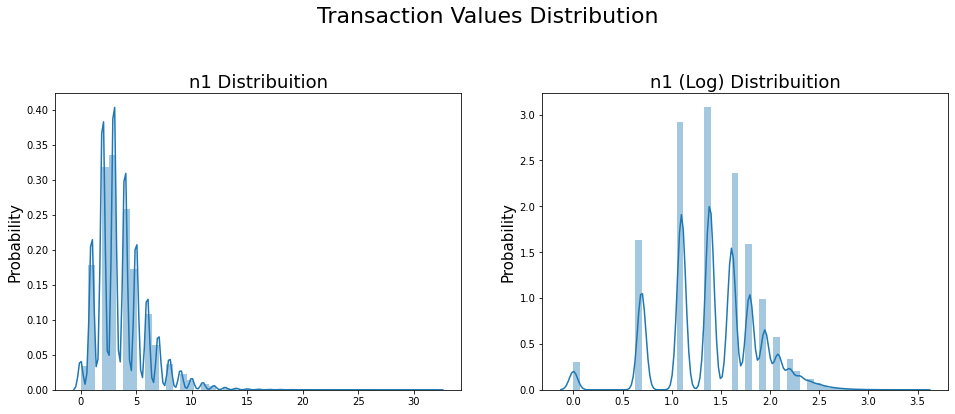

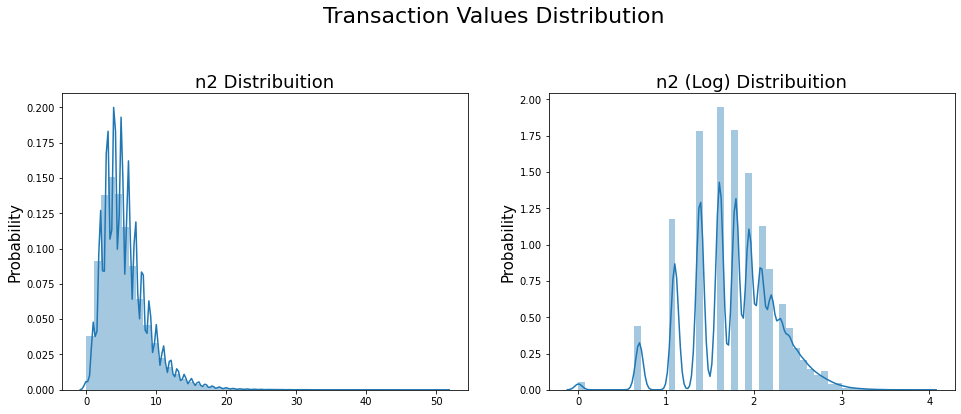

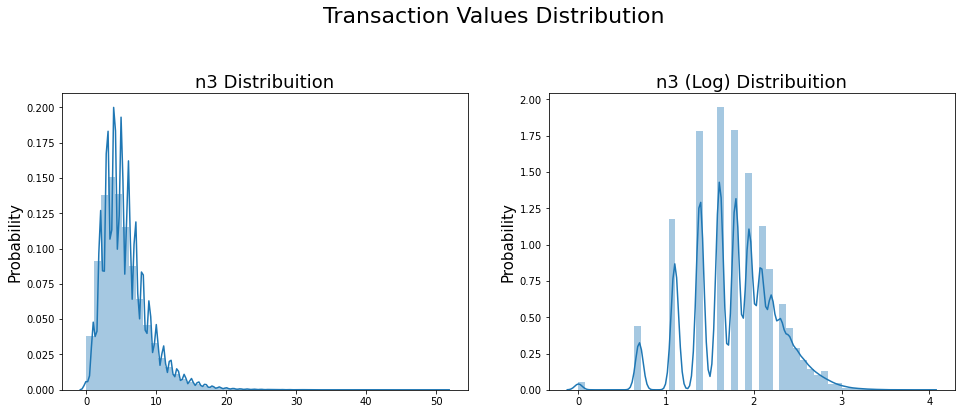

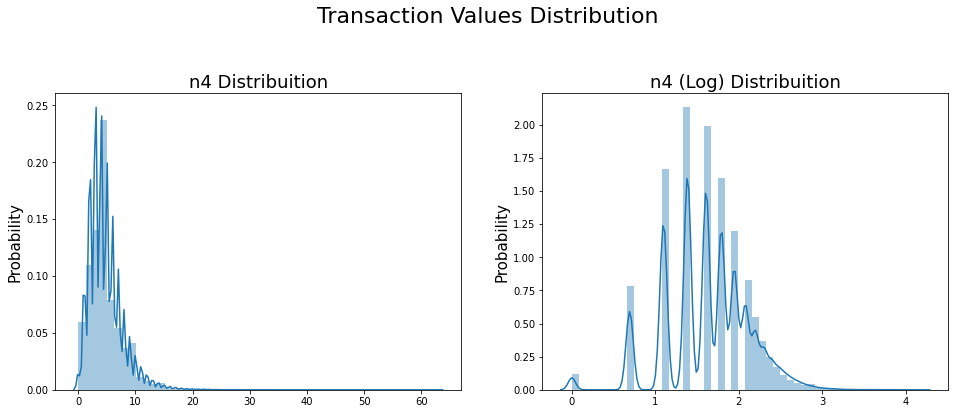

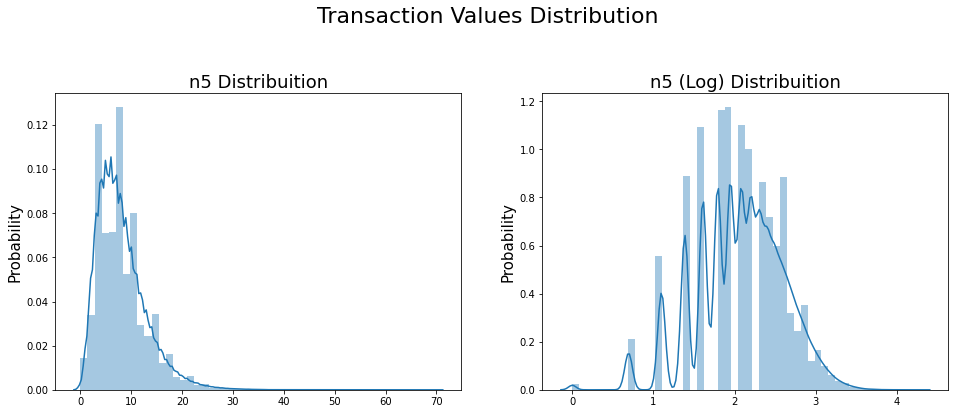

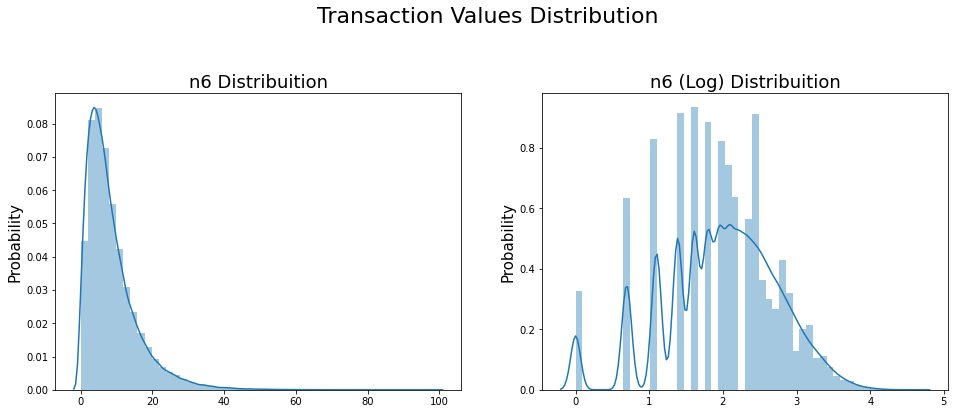

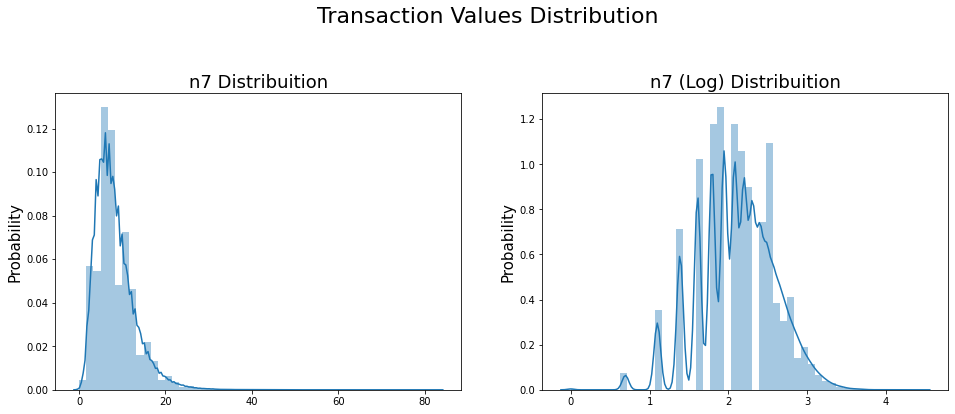

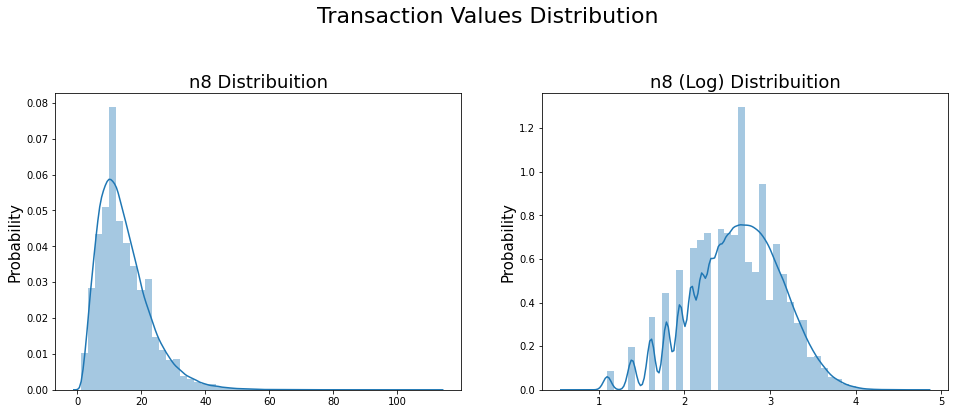

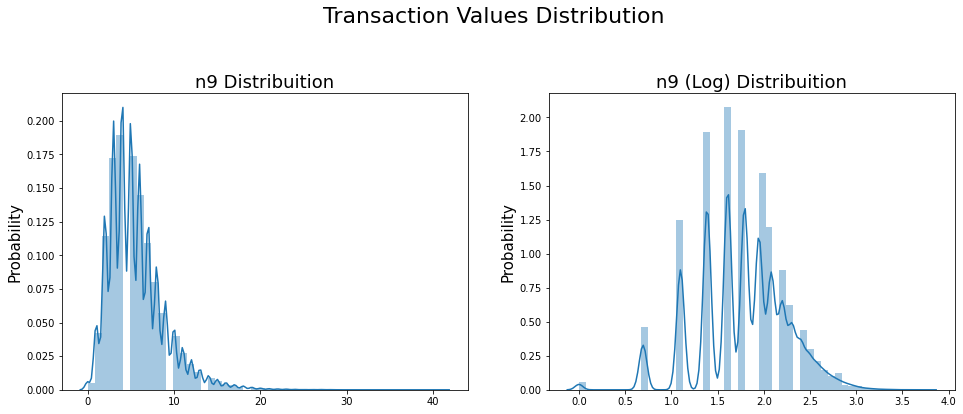

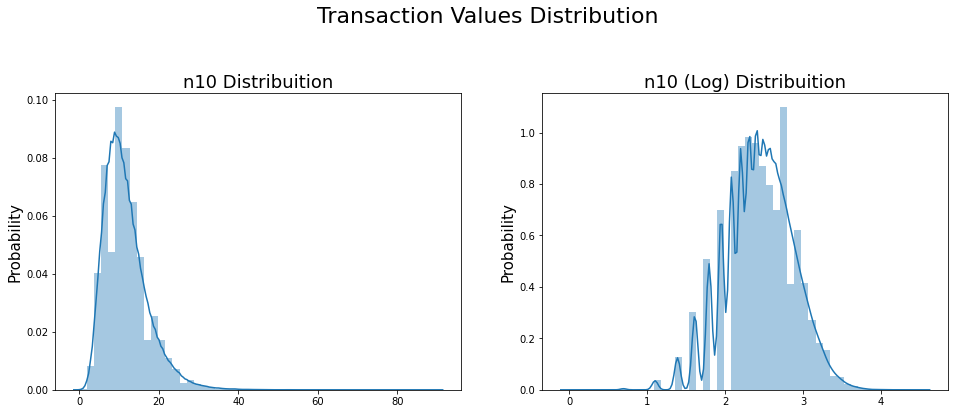

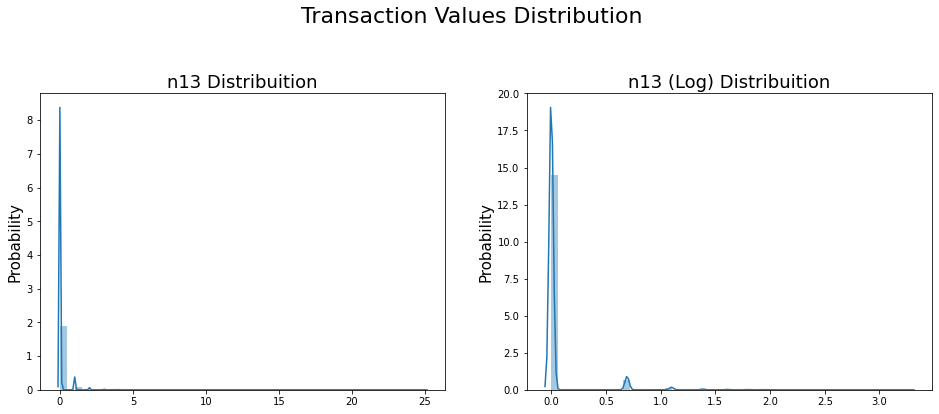

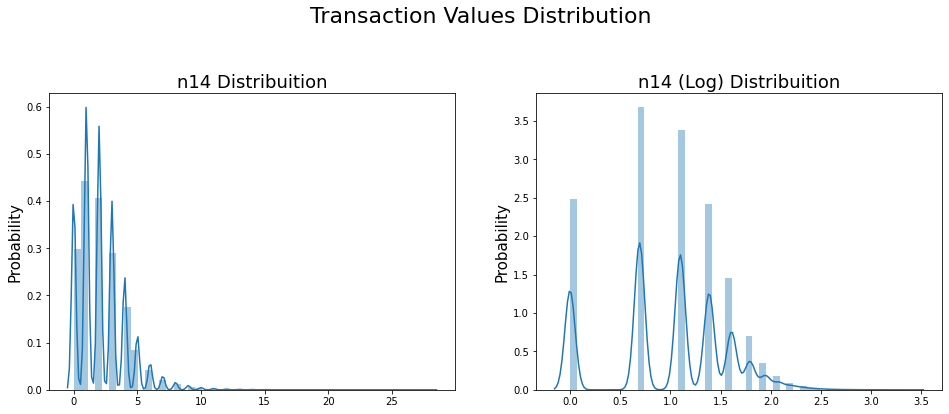

In [64]:
for fea in numerical_serial_fea:
    seeLogged(fea, data_train)

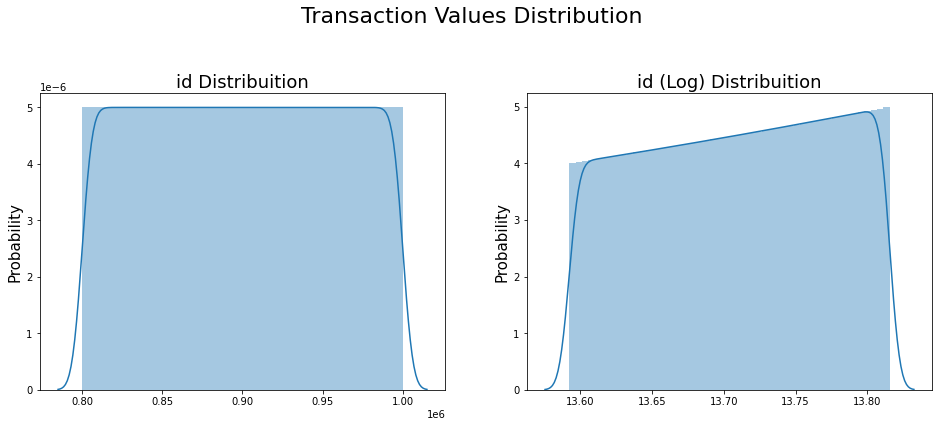

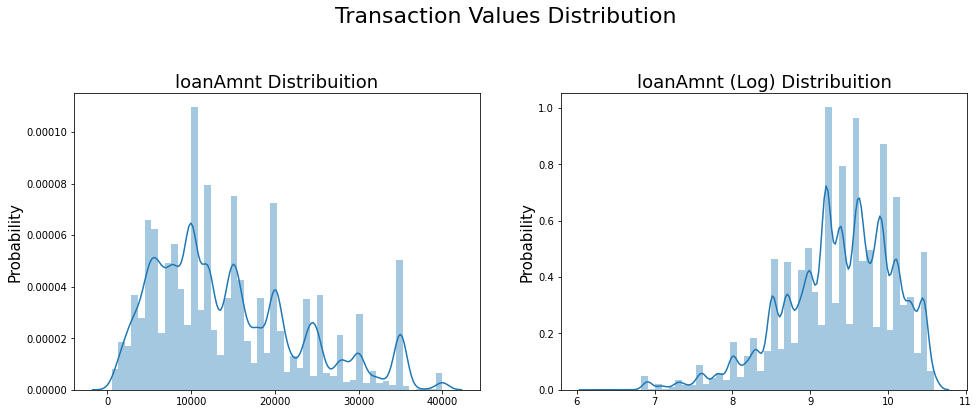

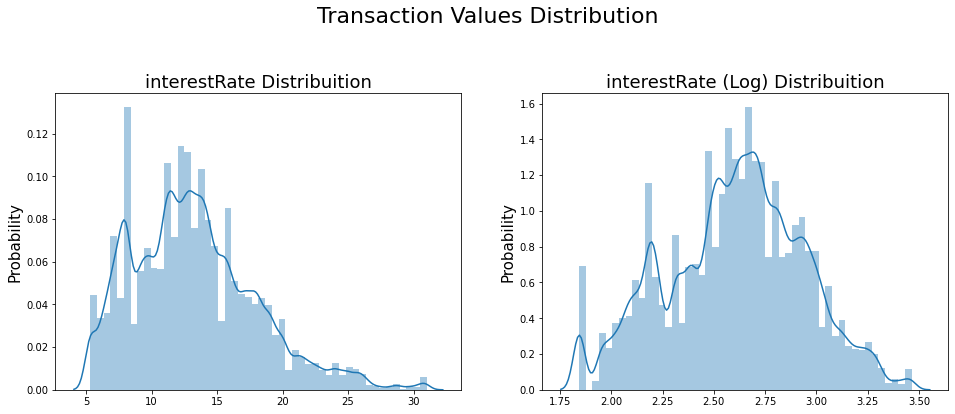

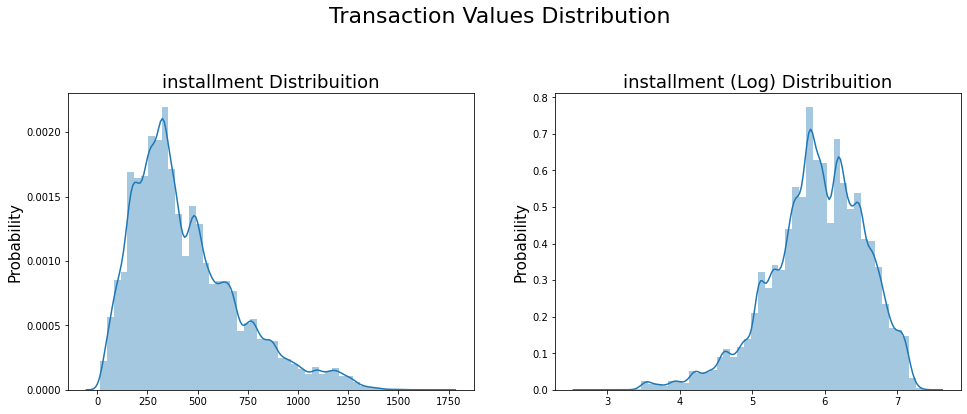

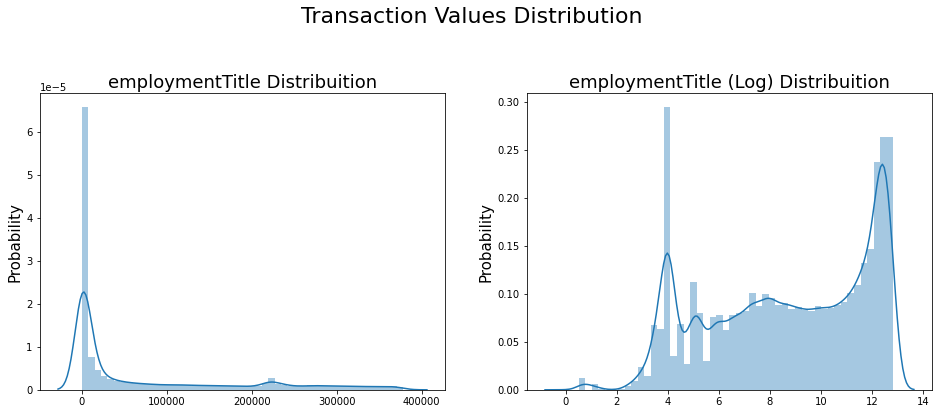

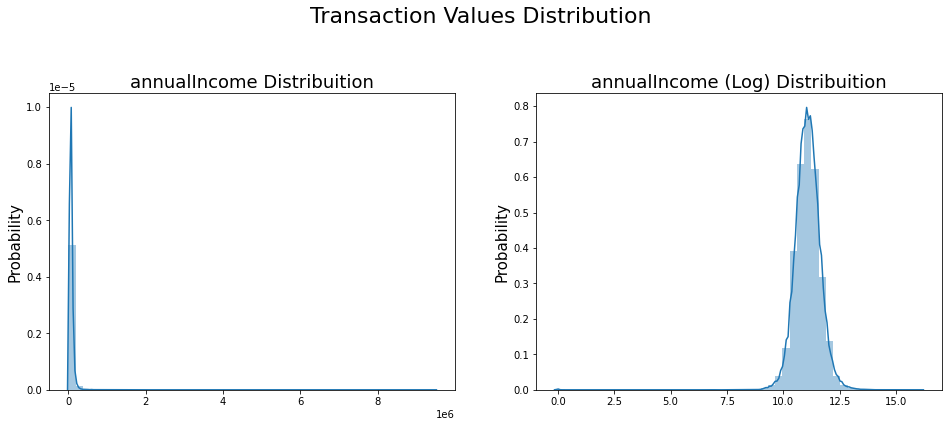

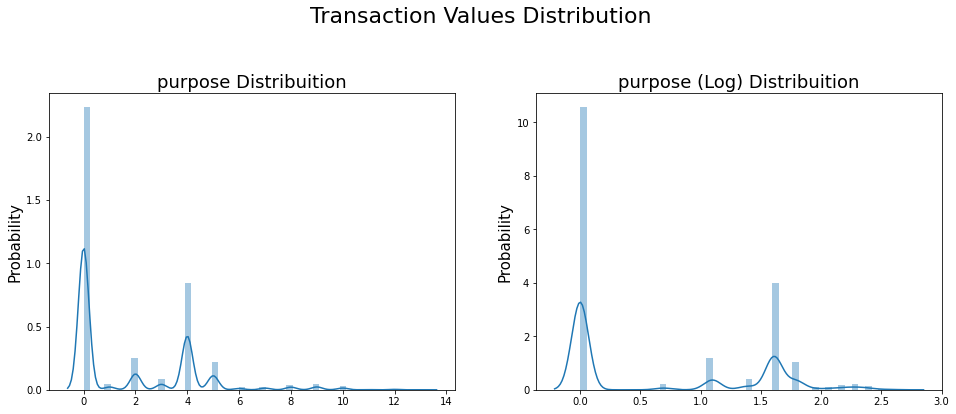

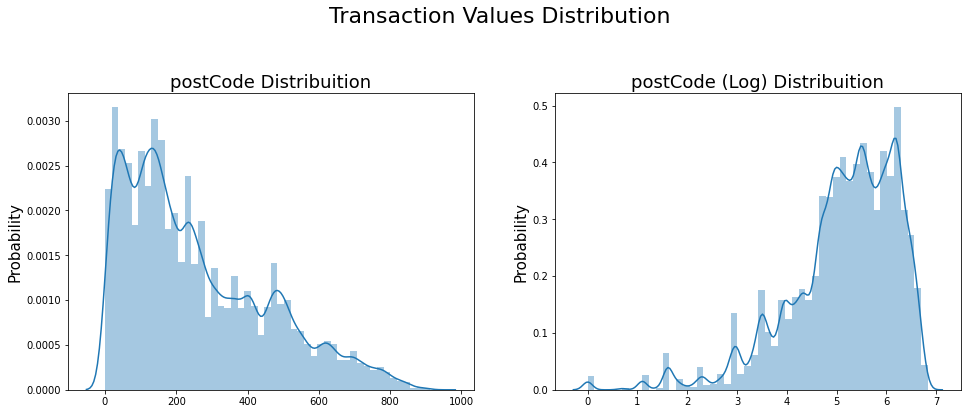

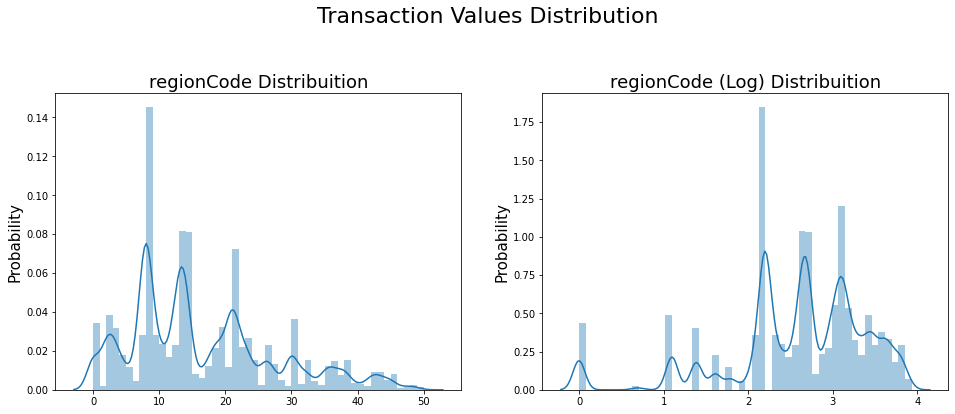

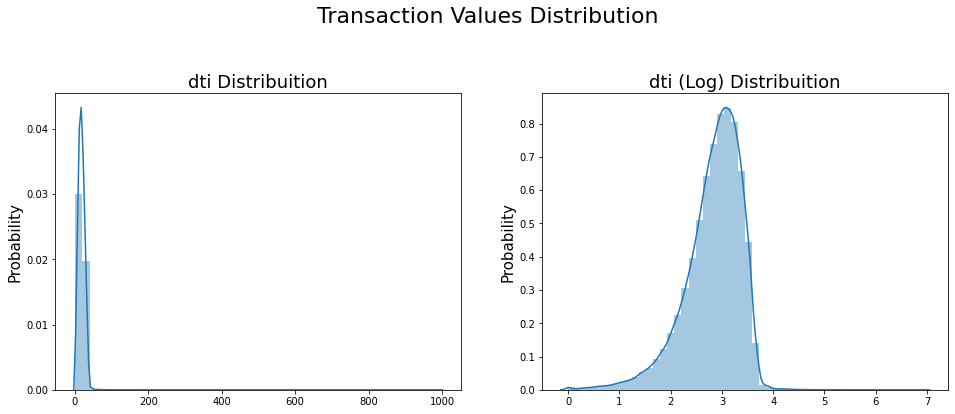

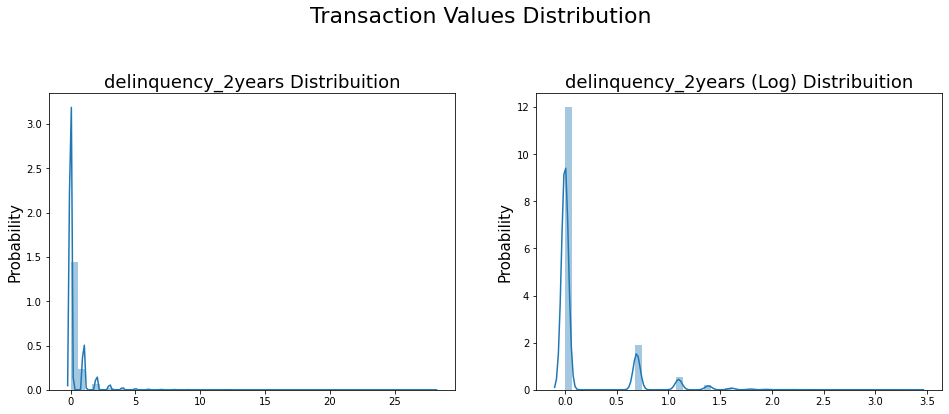

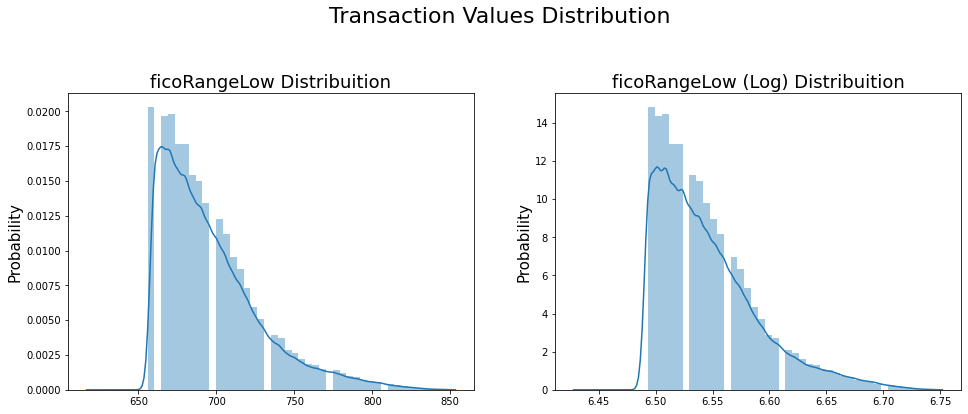

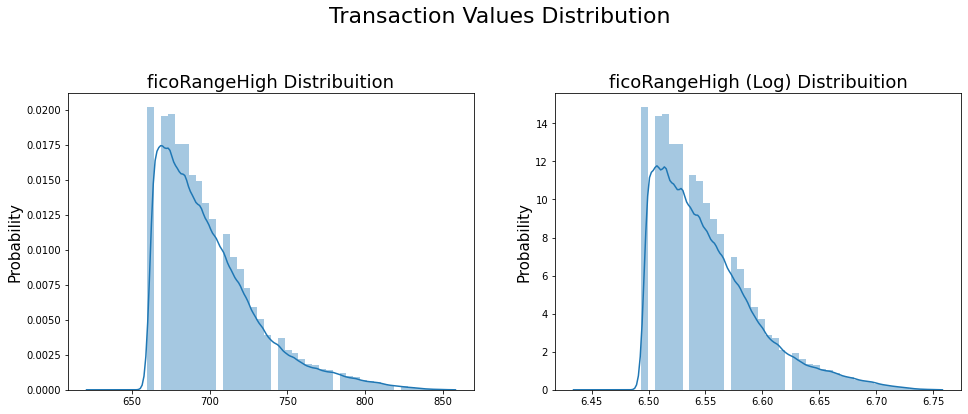

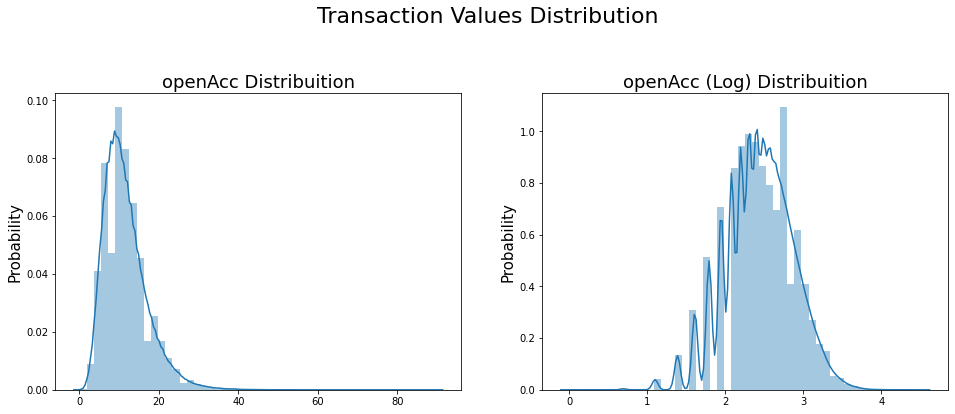

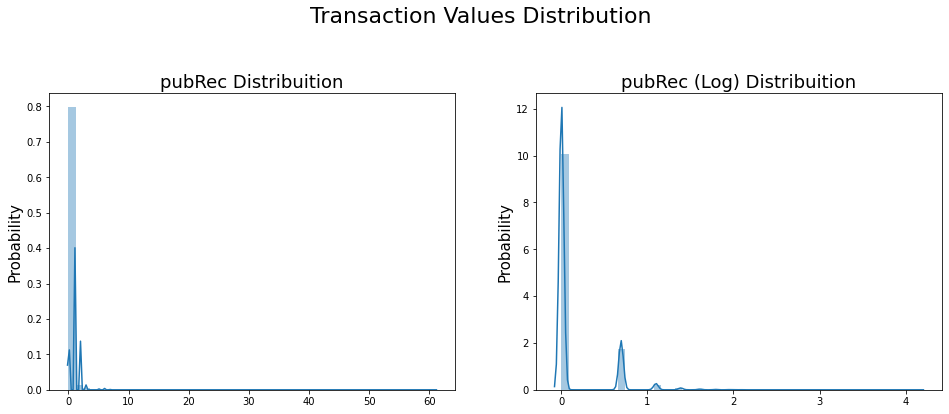

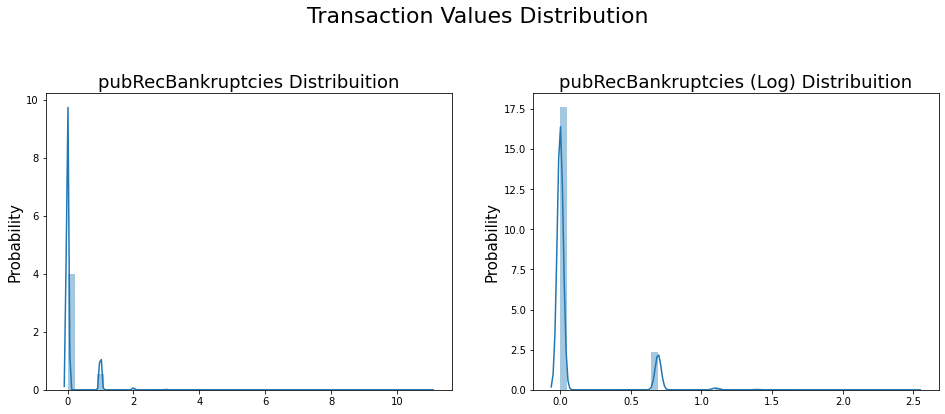

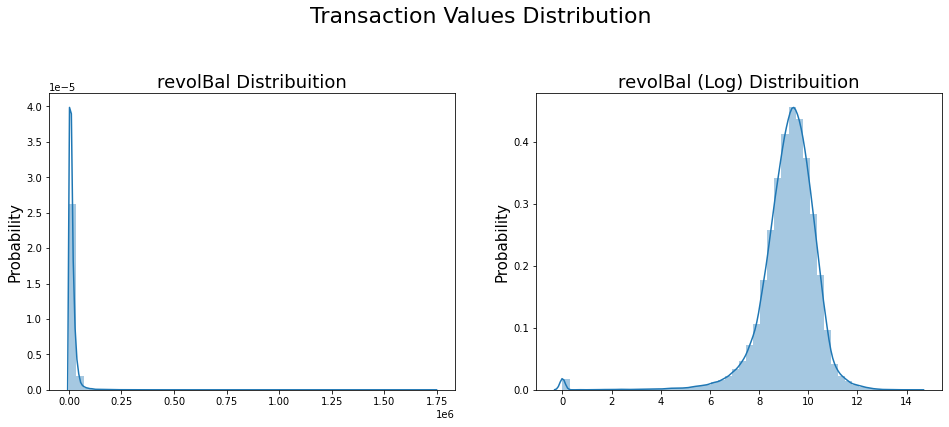

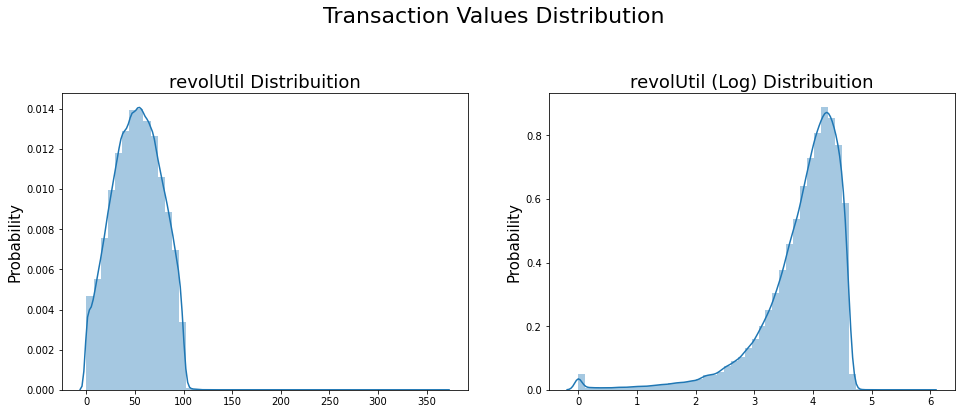

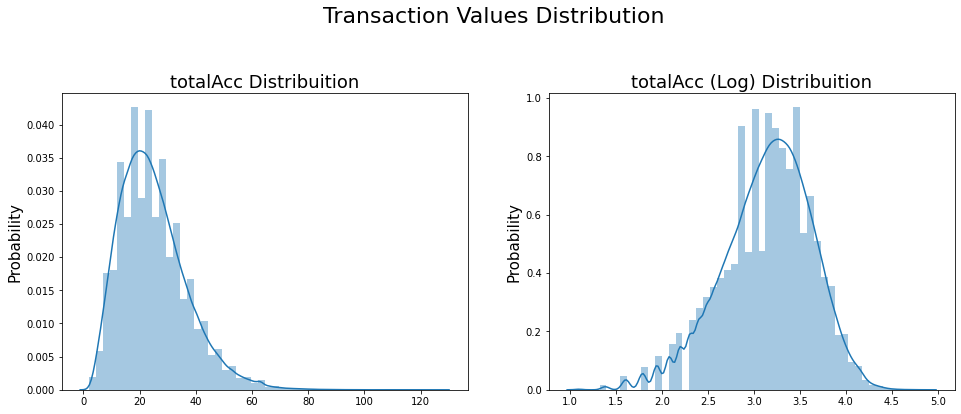

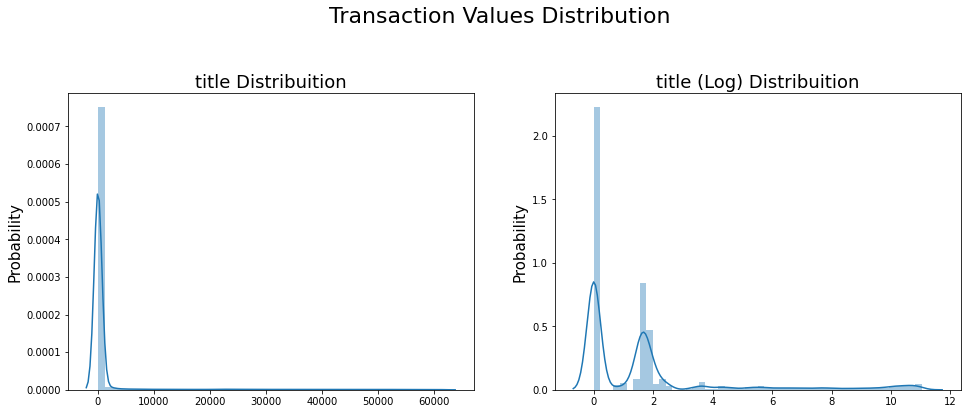

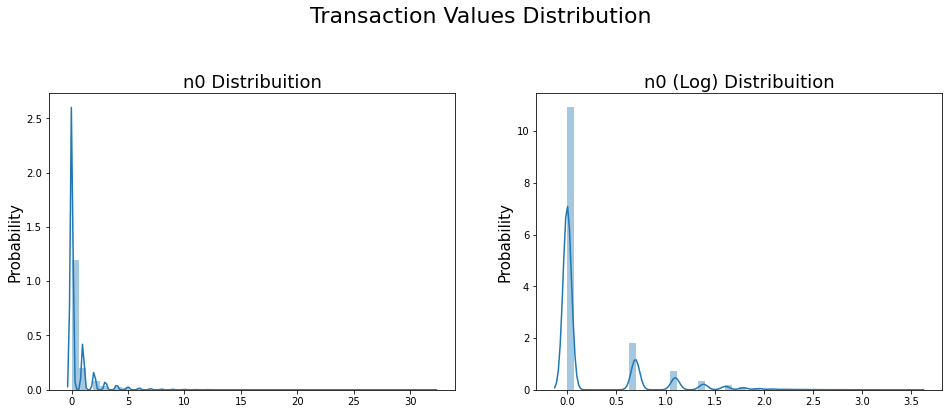

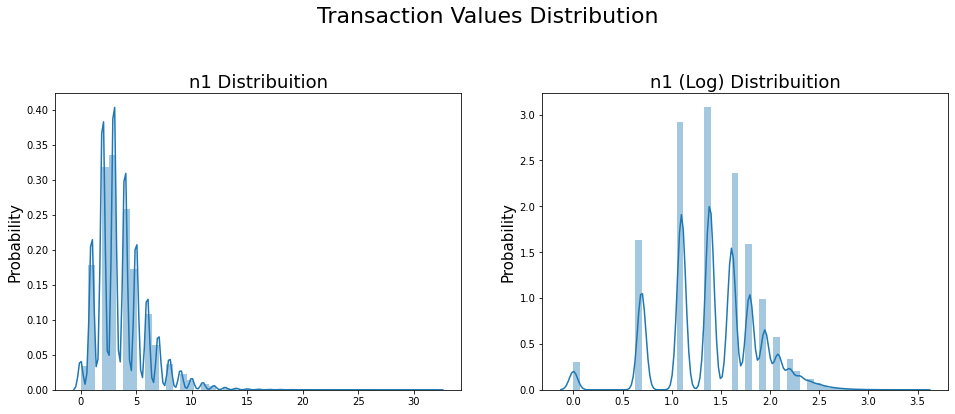

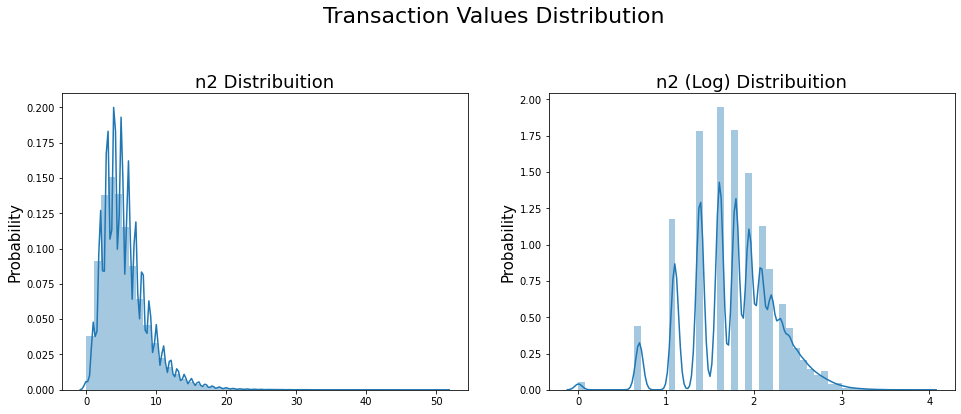

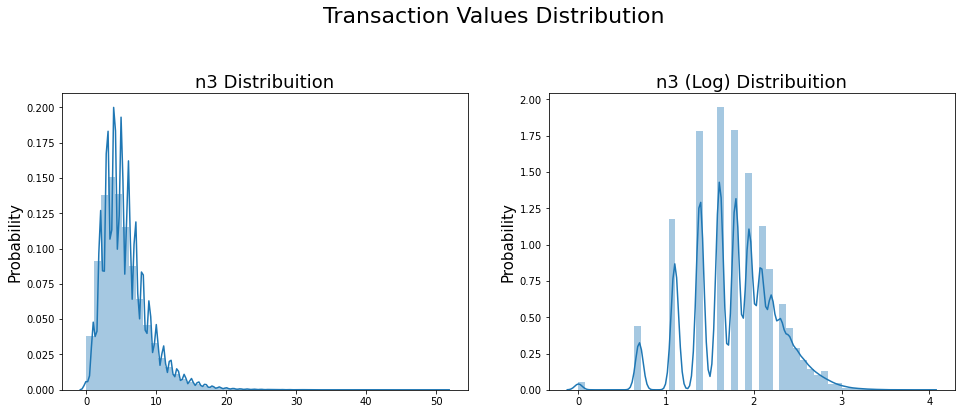

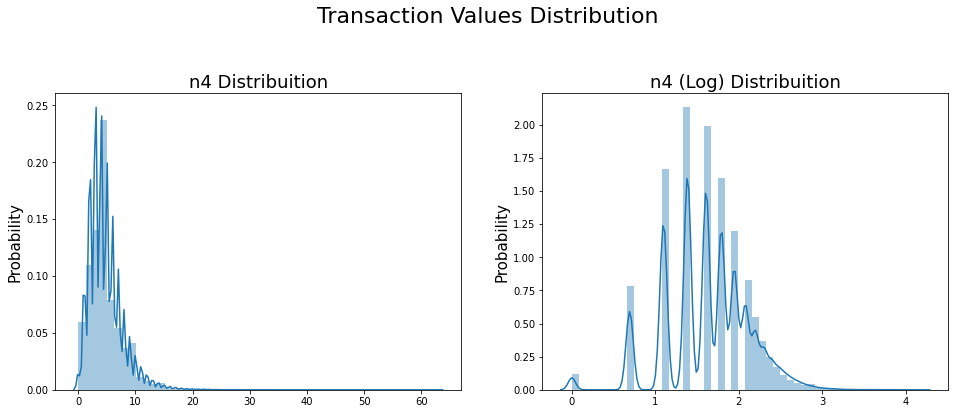

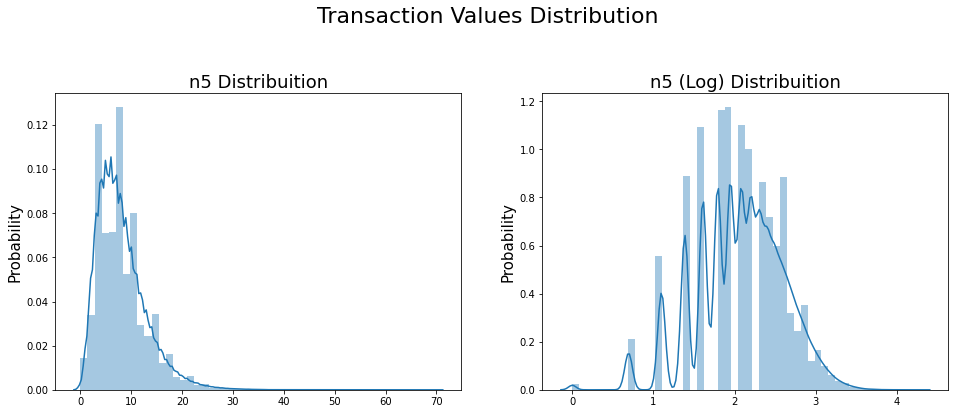

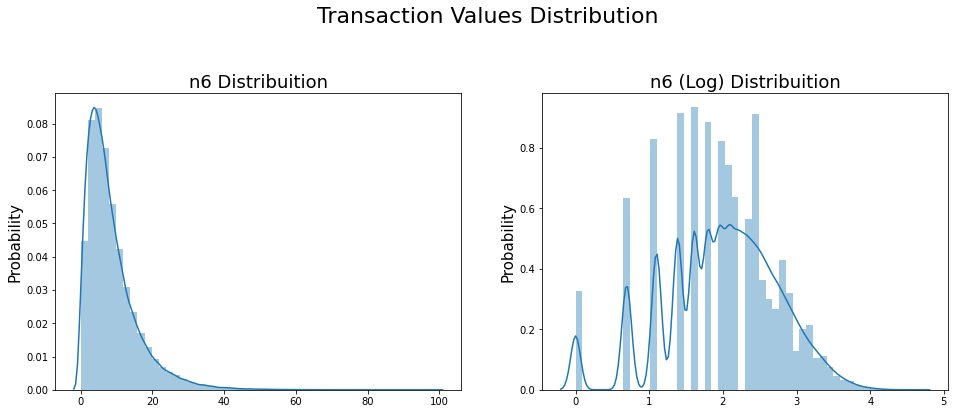

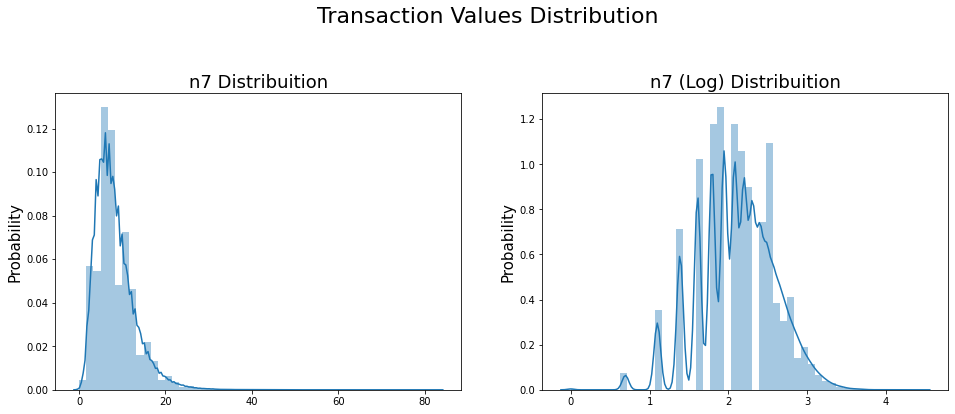

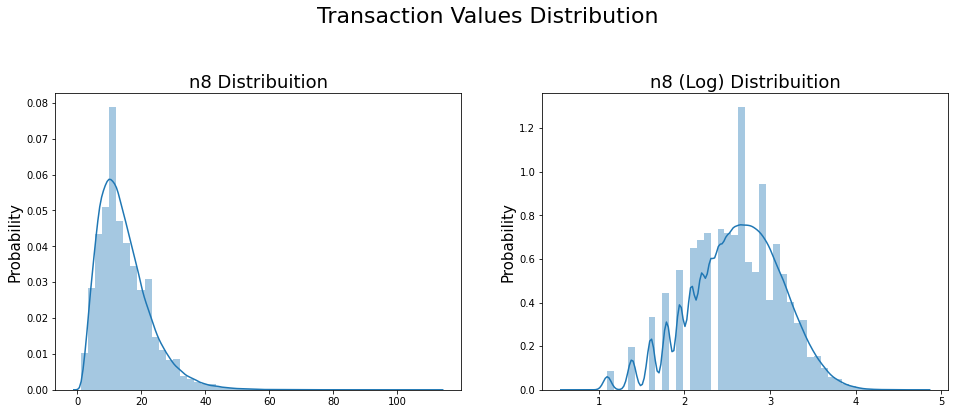

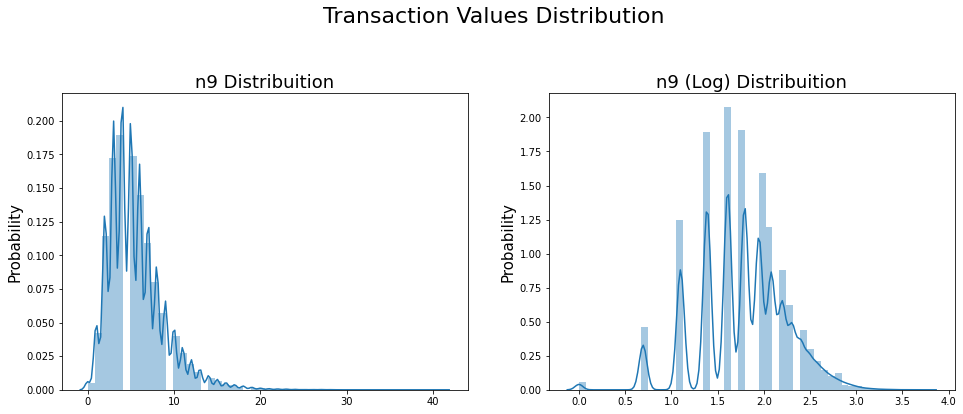

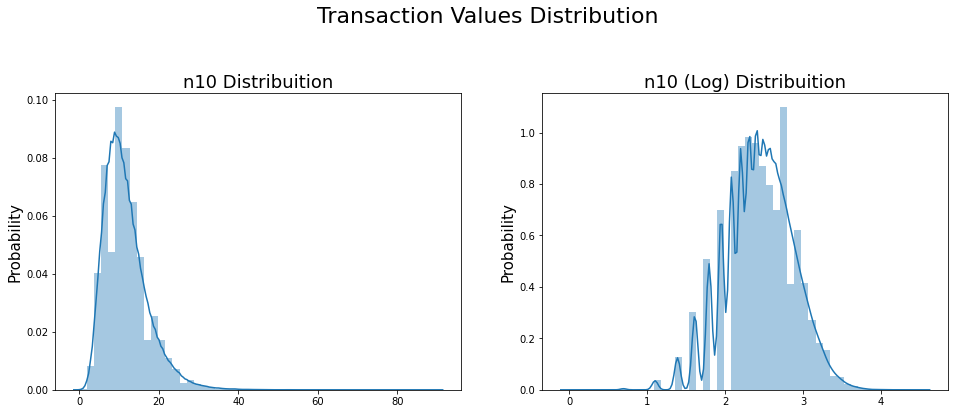

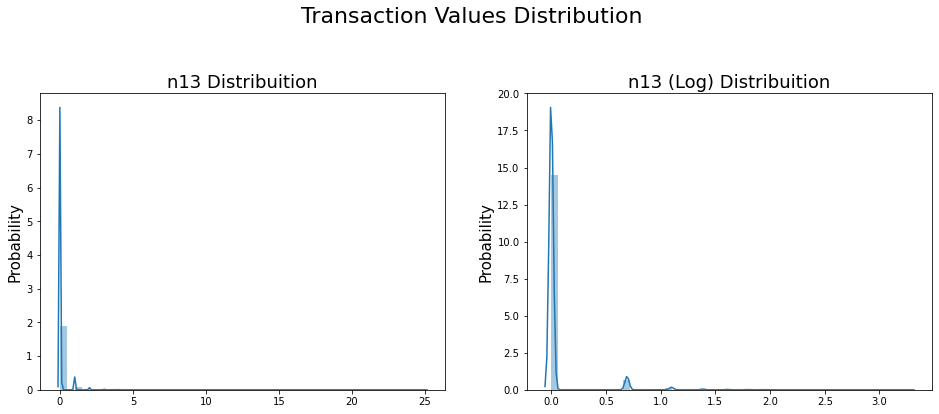

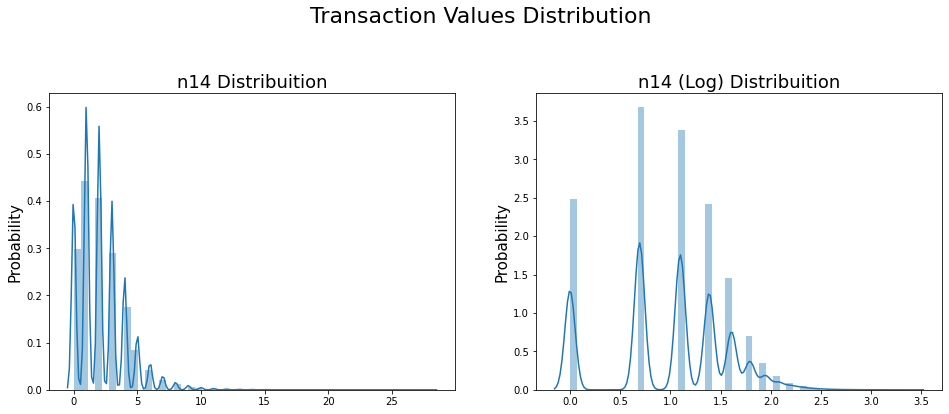

In [65]:
for fea in numerical_serial_fea:
    seeLogged(fea, data_test_a)

See date...

In [106]:
data_train[data_train['issueDate'].str.contains('199')]["issueDate"]

Series([], Name: issueDate, dtype: object)

In [107]:
heheda = data_train[["issueDate"]]

In [115]:
heheda['issueDate_'] = pd.to_datetime(heheda['issueDate'],format='%Y-%m-%d')

In [117]:
heheda['issueYear'] = heheda['issueDate'].apply(lambda x: int(x.split("-")[0]))

In [118]:
heheda['issueYear'] = heheda['issueDate'].apply(lambda x: int(x.split("-")[1]))

In [122]:
heheda.sort_values("issueDate",ascending=True)

issueDate  ... issueYear
647313  2007-06-01  ...         6
739876  2007-07-01  ...         7
762487  2007-07-01  ...         7
590926  2007-07-01  ...         7
212568  2007-07-01  ...         7
...            ...  ...       ...
233730  2018-12-01  ...        12
598851  2018-12-01  ...        12
233849  2018-12-01  ...        12
62234   2018-12-01  ...        12
354751  2018-12-01  ...        12

[800000 rows x 4 columns]

最早的日期果然是2007-06-01. 

那我们就以2007-05-30作为一个起点呗，这样日期的数据就会大于0. 

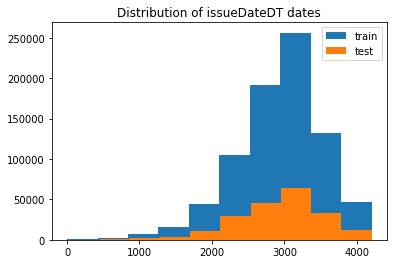

In [123]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-05-30', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days
#转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-05-30', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

plt.hist(data_train['issueDateDT'], label='train');
plt.hist(data_test_a['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

In [124]:
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)

In [125]:
pivot

loanAmnt                    ...                                 
issueDateDT     2        32       63    ...       4142       4173       4203
grade                                   ...                                 
A                NaN  53650.0  42000.0  ...  3919275.0  2694025.0  2245625.0
B                NaN  13000.0  24000.0  ...  4329400.0  3922575.0  3257100.0
C                NaN  68750.0   8175.0  ...  4552600.0  2870050.0  2246250.0
D                NaN      NaN   5500.0  ...  3038500.0  2452375.0  1771750.0
E             7500.0      NaN  10000.0  ...  1131625.0   883950.0   802425.0
F                NaN      NaN  31250.0  ...   315075.0    72300.0        NaN
G                NaN      NaN      NaN  ...    23750.0    25100.0     1000.0

[7 rows x 139 columns]